#Install required libraries

In [ ]:
#if you're using google colab you'll need to run this cell everytime

#Install the required libraries

#install talib google colab

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2022-05-11 13:56:49--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-11 13:56:49--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-11 13:56:49--  http://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge.n

In [ ]:
#if you're using google colab you'll need to run this cell everytime

#install yfinance

!pip install yfinance

     |████████████████████████████████| 6.4 MB 5.0 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
#if you're using google colab you'll need to run this cell everytime

# install python-binance

!pip install python-binance

     |████████████████████████████████| 65 kB 2.0 MB/s 
     |████████████████████████████████| 112 kB 8.6 MB/s 
     |████████████████████████████████| 288 kB 53.5 MB/s 
     |████████████████████████████████| 1.1 MB 41.0 MB/s 
     |████████████████████████████████| 45 kB 2.2 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 144 kB 56.3 MB/s 
     |████████████████████████████████| 271 kB 1.0 MB/s 


#Load required libraries

In [ ]:
# import all necessary libraries

import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
from datetime import datetime
import time
import talib
from talib import abstract
import cufflinks as cf
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from scipy.signal import argrelextrema
from scipy.stats import linregress
from scipy.optimize import curve_fit
import json
import requests
import datetime as dt
import time
import yfinance as yf  
from binance.client import Client

#Pull price data

In [ ]:
# import OHLC data from glassnode going back to 2013

# API key here
API_KEY = '' # insert your Glassnode API KEY here

# report end dates

#yesterday = dt.date.today() - dt.timedelta(days=1)
#unixtimeyesterday = round(time.mktime(yesterday.timetuple()))

today = dt.date.today()
unixtimetoday = round(time.mktime(today.timetuple()))


# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/market/price_usd_ohlc',
        params={'a': 'BTC', 'api_key': API_KEY, 's': '1278716400', 'u': unixtimetoday,
            'i': '24h','f':'JSON', 'timestamp_format':'unix'})

# convert to pandas dataframe
df = pd.read_json(res.text)

In [ ]:
# rework df to explode price dictionary into multiple columns and rename them

# split OHLC dictionary into multiple columns

df_glasnode_ohlc = pd.json_normalize(df['o'])

# append exploded ohlc values into the original df

df = pd.concat([df.drop(['o'], axis=1), df_glasnode_ohlc], axis=1)

# rename the columns

df = df.rename(columns={'t':'date','c':'close','h':'high', 'l':'low', 'o':'open'})

In [ ]:
# transform unix to UTC

df['date'] = pd.to_datetime(df['date'],unit='s')

In [ ]:
# reorder columns

df = df[['date','open', 'high', 'low', 'close']]

In [ ]:
# check if we're ready to start working with bitcoin daily price data since 2013...

df.tail()

,date,open,high,low,close
4311,2022-05-06,36566.667655,36580.241034,35509.211551,36054.160121
4312,2022-05-07,36039.538853,36124.561488,34944.427399,35542.908407
4313,2022-05-08,35490.533652,35490.533652,33890.436592,33987.641361
4314,2022-05-09,34070.852625,34203.515788,30339.983987,30384.579816
4315,2022-05-10,30187.990644,32596.307836,29978.213616,31007.755089


# Run price technical analysis using TA Lib

In [ ]:
# start with technical analysis of the price action using talib

# create a directory of all methods in talib.abstract library

f = talib.abstract

In [ ]:
# create a directory of all methods in talib.abstract library

dir1 = dir(f)

In [ ]:
# create a pattern recognition list for all methods that start with 'CDL', see talib doc for more info

pattern_rec_list = [method for method in dir1 if method.startswith('CDL')]

In [ ]:
# create dictionary with all pattern id and names 

pattern_dict = {'CDL2CROWS':'Two Crows',
'CDL3BLACKCROWS':'Three Black Crows',
'CDL3INSIDE':'Three Inside Up/Down',
'CDL3LINESTRIKE':'Three-Line Strike',
'CDL3OUTSIDE':'Three Outside Up/Down',
'CDL3STARSINSOUTH':'Three Stars In The South',
'CDL3WHITESOLDIERS':'Three Advancing White Soldiers',
'CDLABANDONEDBABY':'Abandoned Baby',
'CDLADVANCEBLOCK':'Advance Block',
'CDLBELTHOLD':'Belt-hold',
'CDLBREAKAWAY':'Breakaway',
'CDLCLOSINGMARUBOZU':'Closing Marubozu',
'CDLCONCEALBABYSWALL':'Concealing Baby Swallow',
'CDLCOUNTERATTACK':'Counterattack',
'CDLDARKCLOUDCOVER':'Dark Cloud Cover',
'CDLDOJI':'Doji',
'CDLDOJISTAR':'Doji Star',
'CDLDRAGONFLYDOJI':'Dragonfly Doji',
'CDLENGULFING':'Engulfing Pattern',
'CDLEVENINGDOJISTAR':'Evening Doji Star',
'CDLEVENINGSTAR':'Evening Star',
'CDLGAPSIDESIDEWHITE':'Up/Down-gap side-by-side white lines',
'CDLGRAVESTONEDOJI':'Gravestone Doji',
'CDLHAMMER':'Hammer',
'CDLHANGINGMAN':'Hanging Man',
'CDLHARAMI':'Harami Pattern',
'CDLHARAMICROSS':'Harami Cross Pattern',
'CDLHIGHWAVE':'High-Wave Candle',
'CDLHIKKAKE':'Hikkake Pattern',
'CDLHIKKAKEMOD':'Modified Hikkake Pattern',
'CDLHOMINGPIGEON':'Homing Pigeon',
'CDLIDENTICAL3CROWS':'Identical Three Crows',
'CDLINNECK':'In-Neck Pattern',
'CDLINVERTEDHAMMER':'Inverted Hammer',
'CDLKICKING':'Kicking',
'CDLKICKINGBYLENGTH':'Kicking - bull/bear determined by the longer marubozu',
'CDLLADDERBOTTOM':'Ladder Bottom',
'CDLLONGLEGGEDDOJI':'Long Legged Doji',
'CDLLONGLINE':'Long Line Candle',
'CDLMARUBOZU':'Marubozu',
'CDLMATCHINGLOW':'Matching Low',
'CDLMATHOLD':'Mat Hold',
'CDLMORNINGDOJISTAR':'Morning Doji Star',
'CDLMORNINGSTAR':'Morning Star',
'CDLONNECK':'On-Neck Pattern',
'CDLPIERCING':'Piercing Pattern',
'CDLRICKSHAWMAN':'Rickshaw Man',
'CDLRISEFALL3METHODS':'Rising/Falling Three Methods',
'CDLSEPARATINGLINES':'Separating Lines',
'CDLSHOOTINGSTAR':'Shooting Star',
'CDLSHORTLINE':'Short Line Candle',
'CDLSPINNINGTOP':'Spinning Top',
'CDLSTALLEDPATTERN':'Stalled Pattern',
'CDLSTICKSANDWICH':'Stick Sandwich',
'CDLTAKURI':'Takuri (Dragonfly Doji with very long lower shadow)',
'CDLTASUKIGAP':'Tasuki Gap',
'CDLTHRUSTING':'Thrusting Pattern',
'CDLTRISTAR':'Tristar Pattern',
'CDLUNIQUE3RIVER':'Unique 3 River',
'CDLUPSIDEGAP2CROWS':'Upside Gap Two Crows',
'CDLXSIDEGAP3METHODS':'Upside/Downside Gap Three Methods'}

In [ ]:
# create an empty list for each value in the dict

pattern_lists = dict()

for value in pattern_dict.values():
    pattern_lists[value] = []

In [ ]:
# calculate each pattern and store results in the dictionary of lists we created earlier

pattern_lists_3 = list()

for i, j, k in zip(pattern_rec_list, pattern_lists.keys(), pattern_dict.values()):
    results = getattr(f,i)(df['open'], df['high'], df['low'], df['close'])
    pattern_lists[j] = results

In [ ]:
# append each key value from the dictionary as a column in a dataframe of patterns

df_patterns = pd.DataFrame.from_dict(pattern_lists)

In [ ]:
df_patterns.head()

,Two Crows,Three Black Crows,Three Inside Up/Down,Three-Line Strike,Three Outside Up/Down,Three Stars In The South,Three Advancing White Soldiers,Abandoned Baby,Advance Block,Belt-hold,...,Spinning Top,Stalled Pattern,Stick Sandwich,Takuri (Dragonfly Doji with very long lower shadow),Tasuki Gap,Thrusting Pattern,Tristar Pattern,Unique 3 River,Upside Gap Two Crows,Upside/Downside Gap Three Methods
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# concatenate original ohlc df with the pattern df

df = pd.concat([df, df_patterns], axis=1)

In [ ]:
df.head()

,date,open,high,low,close,Two Crows,Three Black Crows,Three Inside Up/Down,Three-Line Strike,Three Outside Up/Down,...,Spinning Top,Stalled Pattern,Stick Sandwich,Takuri (Dragonfly Doji with very long lower shadow),Tasuki Gap,Thrusting Pattern,Tristar Pattern,Unique 3 River,Upside Gap Two Crows,Upside/Downside Gap Three Methods
0,2010-07-17,0.04951,0.04951,0.04951,0.049510,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-07-18,0.05941,0.08585,0.05941,0.085840,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-07-19,0.09090,0.09307,0.07855,0.080800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-07-20,0.08181,0.08181,0.07426,0.074733,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-07-21,0.07425,0.07921,0.06634,0.079210,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# calculate some momentum indicators

rsi = talib.RSI(df['close'], timeperiod=14)

fifty_sma = talib.SMA(df['close'], timeperiod=50)

twohundred_sma = talib.SMA(df['close'], timeperiod=200)

macd, macdsignal, macdhist = talib.MACD(df['close'], fastperiod=12, slowperiod=26, signalperiod=9)

fastk, fastd = talib.STOCHRSI(df['close'], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)

In [ ]:
# add new fields to base dataframe

df['RSI'] = rsi
df['50SMA'] = fifty_sma
df['200SMA'] = twohundred_sma
df['MACD'] = macd
df['MACDSignal'] = macdsignal
df['MACDHist'] = macdhist
df['StochRSIFastk'] = fastk
df['StochRSIFastd'] = fastd

In [ ]:
# define several functions to calculate key events in momentum indicators

# Function that signals golden cross or death cross

def golden_death_cross(df):
    sigBuy = []
    sigSell = []
    flag = -1
    for i in range(len(df)):
        # GOLDEN CROSS & VOL25 > VOL100
        if ((df['50SMA'][i] > df['200SMA'][i])):
            if flag != 1:
                sigBuy.append(100)
                sigSell.append(0)
                flag = 1
            else:
                sigBuy.append(0)
                sigSell.append(0)
        # DEATH CROSS
        elif df['50SMA'][i] < df['200SMA'][i]:
            if flag != 0:
                sigBuy.append(0)
                sigSell.append(-100)
                flag = 0 
            else:
                sigBuy.append(0)
                sigSell.append(0)
        else:
            sigBuy.append(0)
            sigSell.append(0)
    return [sigBuy, sigSell]

# Function that signals MACD Crossings

def macd_cross(df):
    sigBuy = []
    sigSell = []
    flag = -1
    for i in range(len(df)):
        # macd bull cross and macd above 0
        if ((df['MACD'][i] > df['MACDSignal'][i]) and (df['MACD'][i] > 0)):
            if flag != 1:
                sigBuy.append(100)
                sigSell.append(0)
                flag = 1
            else:
                sigBuy.append(0)
                sigSell.append(0)
        # DEATH CROSS
        elif df['MACD'][i] < df['MACDSignal'][i]:
            if flag != 0:
                sigBuy.append(0)
                sigSell.append(-100)
                flag = 0 
            else:
                sigBuy.append(0)
                sigSell.append(0)
        else:
            sigBuy.append(0)
            sigSell.append(0)
    return [sigBuy, sigSell]

# Function that signals RSI Crossings

def rsi_cross(df):
    sigBuy = []
    sigSell = []
    flag = -1
    for i in range(len(df)):
        # rsi bull cross
        if (df['RSI'][i] > 30):
            if flag != 1:
                sigBuy.append(100)
                sigSell.append(0)
                flag = 1
            else:
                sigBuy.append(0)
                sigSell.append(0)
        # DEATH CROSS
        elif df['RSI'][i] < 70:
            if flag != 0:
                sigBuy.append(0)
                sigSell.append(-100)
                flag = 0 
            else:
                sigBuy.append(0)
                sigSell.append(0)
        else:
            sigBuy.append(0)
            sigSell.append(0)
    return [sigBuy, sigSell]

# Function that signals StochRSI Crossings

def stochrsi_cross(df):
    sigBuy = []
    sigSell = []
    flag = -1
    for i in range(len(df)):
        # rsi bull cross
        if (df['StochRSIFastd'][i] > 50):
            if flag != 1:
                sigBuy.append(100)
                sigSell.append(0)
                flag = 1
            else:
                sigBuy.append(0)
                sigSell.append(0)
        # DEATH CROSS
        elif df['StochRSIFastd'][i] < 50:
            if flag != 0:
                sigBuy.append(0)
                sigSell.append(-100)
                flag = 0 
            else:
                sigBuy.append(0)
                sigSell.append(0)
        else:
            sigBuy.append(0)
            sigSell.append(0)
    return [sigBuy, sigSell]



In [ ]:
# calculate golden cross or death cross

goldenx_or_deathx = golden_death_cross(df)
# add golden cross and death cross colums to df
df['golden_cross'] = goldenx_or_deathx[0]
df['death_cross'] = goldenx_or_deathx[1]

# calculate MACD crossings

macd_cross_bullorbear = macd_cross(df)
# add MACD signals to the main dataframe
df['macd_bull_cross'] = macd_cross_bullorbear[0]
df['macd_bear_cross'] = macd_cross_bullorbear[1]

# calculate RSI crossings

rsi_cross_bullorbear = rsi_cross(df)
# add RSI signals to the main dataframe
df['rsi_bull_cross'] = rsi_cross_bullorbear[0]
df['rsi_bear_cross'] = rsi_cross_bullorbear[1]

#calculate StochRSI signals
stochrsi_cross_bullorbear = stochrsi_cross(df)
# add StochRSI signals to the main dataframe

df['stochrsi_bull_cross'] = stochrsi_cross_bullorbear[0]
df['stochrsi_bear_cross'] = stochrsi_cross_bullorbear[1]


In [ ]:
# calculate mean score across pattern recognition

df['pattern_mean_score'] = df[['Two Crows',
 'Three Black Crows',
 'Three Inside Up/Down',
 'Three-Line Strike',
 'Three Outside Up/Down',
 'Three Stars In The South',
 'Three Advancing White Soldiers',
 'Abandoned Baby',
 'Advance Block',
 'Belt-hold',
 'Breakaway',
 'Closing Marubozu',
 'Concealing Baby Swallow',
 'Counterattack',
 'Dark Cloud Cover',
 'Doji',
 'Doji Star',
 'Dragonfly Doji',
 'Engulfing Pattern',
 'Evening Doji Star',
 'Evening Star',
 'Up/Down-gap side-by-side white lines',
 'Gravestone Doji',
 'Hammer',
 'Hanging Man',
 'Harami Pattern',
 'Harami Cross Pattern',
 'High-Wave Candle',
 'Hikkake Pattern',
 'Modified Hikkake Pattern',
 'Homing Pigeon',
 'Identical Three Crows',
 'In-Neck Pattern',
 'Inverted Hammer',
 'Kicking',
 'Kicking - bull/bear determined by the longer marubozu',
 'Ladder Bottom',
 'Long Legged Doji',
 'Long Line Candle',
 'Marubozu',
 'Matching Low',
 'Mat Hold',
 'Morning Doji Star',
 'Morning Star',
 'On-Neck Pattern',
 'Piercing Pattern',
 'Rickshaw Man',
 'Rising/Falling Three Methods',
 'Separating Lines',
 'Shooting Star',
 'Short Line Candle',
 'Spinning Top',
 'Stalled Pattern',
 'Stick Sandwich',
 'Takuri (Dragonfly Doji with very long lower shadow)',
 'Tasuki Gap',
 'Thrusting Pattern',
 'Tristar Pattern',
 'Unique 3 River',
 'Upside Gap Two Crows',
 'Upside/Downside Gap Three Methods']].mean(axis=1)

In [ ]:
# calculate mean score across pattern recognition

df['momentum_mean_score'] = df[['macd_bull_cross',
 'macd_bear_cross',
 'rsi_bull_cross',
 'rsi_bear_cross',
 'stochrsi_bull_cross',
 'stochrsi_bear_cross',
 'golden_cross',
 'death_cross'
]].mean(axis=1)

In [ ]:
# calculate moving averages of pattern score and momentum score

df['pattern_mean_score_30D_MA'] = df['pattern_mean_score'].rolling(window=30).mean()
df['pattern_mean_score_60D_MA'] = df['pattern_mean_score'].rolling(window=60).mean()
df['pattern_mean_score_90D_MA'] = df['pattern_mean_score'].rolling(window=90).mean()
df['momentum_mean_score_30D_MA'] = df['momentum_mean_score'].rolling(window=30).mean()
df['momentum_mean_score_60D_MA'] = df['momentum_mean_score'].rolling(window=60).mean()
df['momentum_mean_score_90D_MA'] = df['momentum_mean_score'].rolling(window=90).mean()

# calculate exponential moving averages

df['pattern_mean_score_90D_EMA'] = df['pattern_mean_score'].ewm(span=90, adjust=False).mean()
df['momentum_mean_score_90D_EMA'] = df['momentum_mean_score'].ewm(span=90, adjust=False).mean()

In [ ]:
# calculate max, min, average and standard deviation for pattern mean score

print("Max bullish score is: "+str(df['pattern_mean_score'].max()))
print("Max bearish score is: "+str(df['pattern_mean_score'].min()))
print("Average pattern score is: "+str(df['pattern_mean_score'].mean()))
print("Standard Deviation pattern score is: "+str(df['pattern_mean_score'].std()))

Max bullish score is: 16.39344262295082
Max bearish score is: -13.114754098360656
Average pattern score is: 1.1413877451799597
Standard Deviation pattern score is: 3.5953305385823846


In [ ]:
print("Max bullish momentum score is: "+str(df['momentum_mean_score'].max()))
print("Max bearish momentum score is: "+str(df['momentum_mean_score'].min()))
print("Average momentum score is: "+str(df['momentum_mean_score'].mean()))
print("Standard Deviation momentum score is: "+str(df['momentum_mean_score'].std()))

Max bullish momentum score is: 25.0
Max bearish momentum score is: -25.0
Average momentum score is: 0.0
Standard Deviation momentum score is: 6.481098286109096


In [ ]:
# define functions to plot different views as part of the exploratory data analysis

def histogram_median_mean(x, feature_name):
    plt.rcParams["figure.figsize"] = (8,6)
    plt.rc('font', size=12)
    result = plt.hist(x, bins='auto', color='#b887ed', alpha=0.9)
    plt.axvline(x.mean(), color='k', linestyle='dashed',linewidth=1, label=x.mean)
    plt.axvline(x.median(), color='k', linestyle='solid',linewidth=1, label=x.median)
    plt.title('{} '.format(feature_name)+"Distribution with Median (solid)\n and Mean (dashed) lines")
    plt.xlabel('{} '.format(feature_name))
    plt.ylabel("Frequency")
    plt.text(x.mean()*1.1, 200,'Mean : {:.2f}'.format(x.mean()))
    plt.text(x.median()*1.1, 100, 'Median : {:.2f}'.format(x.median()))
    plt.show()

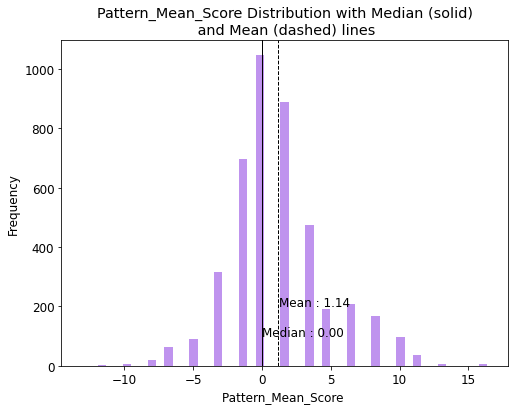

In [ ]:
# build some histogram vis

histogram_median_mean(df['pattern_mean_score'], "Pattern_Mean_Score")

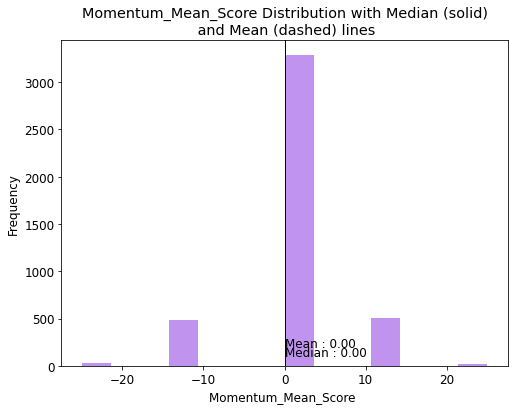

In [ ]:
# build some histogram vis

histogram_median_mean(df['momentum_mean_score'], "Momentum_Mean_Score")

#Work on Mayer Multiple

In [ ]:
# add Mayer multiple indicator

df['mayer_multiple']=df['close']/df['200SMA']

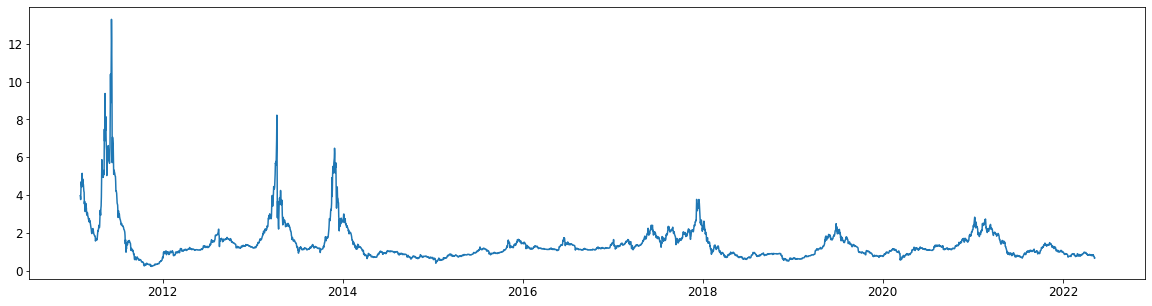

In [ ]:
# plot mayer multiple

fig, ax = plt.subplots(figsize=(20,5))

ax.plot(df['date'],df['mayer_multiple'])

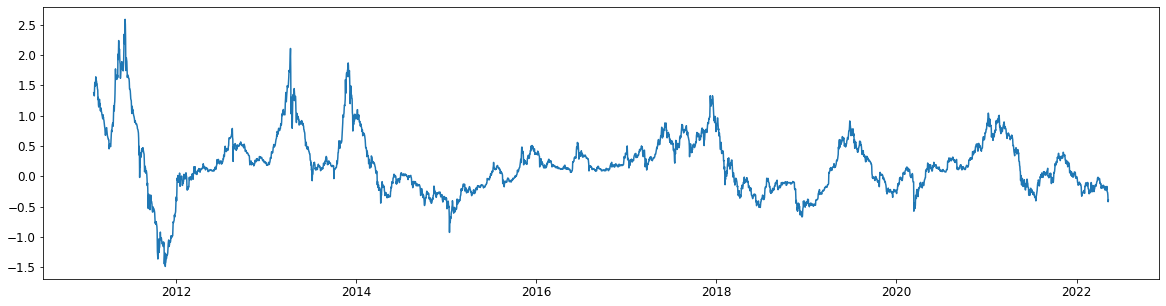

In [ ]:
# plot mayer multiple with logarithmic transformation 
# reason https://charts.woobull.com/bitcoin-mayer-multiple/ and https://twitter.com/PrfDude/status/1482062792203067393

fig, ax = plt.subplots(figsize=(20,5))

ax.plot(df['date'],np.log(df['mayer_multiple']))

In [ ]:
# add a new column with the logarithm of the mayer multiple

df['log_mayer_multiple'] = np.log(df['mayer_multiple'])

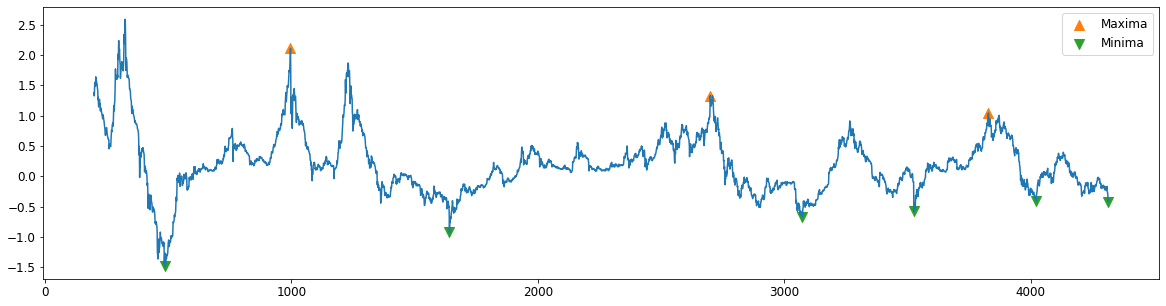

In [ ]:
# plot local maxima and minima using 

from scipy.signal import argrelextrema

mayer_max_idx = argrelextrema(df['log_mayer_multiple'].values, 
  np.greater, order=600)[0]
mayer_min_idx = argrelextrema(df['log_mayer_multiple'].values, 
  np.less, order=270)[0]

fig, ax = plt.subplots(figsize=(20,5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(np.log(df['mayer_multiple']))
ax.scatter(df.iloc[mayer_max_idx].index, df.iloc[mayer_max_idx]['log_mayer_multiple'],
  label='Maxima', s=100, color=colors[1], marker='^')
ax.scatter(df.iloc[mayer_min_idx].index, df.iloc[mayer_min_idx]['log_mayer_multiple'],
  label='Minima', s=100, color=colors[2], marker='v')
ax.legend()


In [ ]:
# create pd series with log mayer multiple highs and lows

mayer_highs = df.iloc[mayer_max_idx]['log_mayer_multiple']
mayer_lows = df.iloc[mayer_min_idx]['log_mayer_multiple']

print(mayer_highs)

997     2.107553
2700    1.328027
3828    1.041067
Name: log_mayer_multiple, dtype: float64


In [ ]:
#add the initial high in log mayer multiple

mayer_init_max_idx = df['log_mayer_multiple'].idxmax()
mayer_init_max_value = df['log_mayer_multiple'].max()

print(mayer_init_max_idx)
print(mayer_init_max_value)

326
2.5875313569819247


In [ ]:
# build a pandas series with the initial max

mayer_highs_init_max = pd.Series([2.5875313569819247], index=[326])

In [ ]:
# concatenate the initial log mayer max with the rest of local maximums

mayer_highs = mayer_highs_init_max.append(mayer_highs)
print(mayer_highs)

326     2.587531
997     2.107553
2700    1.328027
3828    1.041067
dtype: float64


In [ ]:
# transform high and low series to dataframe, to then calculate a linear regression across them

mayer_highs = pd.DataFrame(mayer_highs)

mayer_lows = pd.DataFrame(mayer_lows)

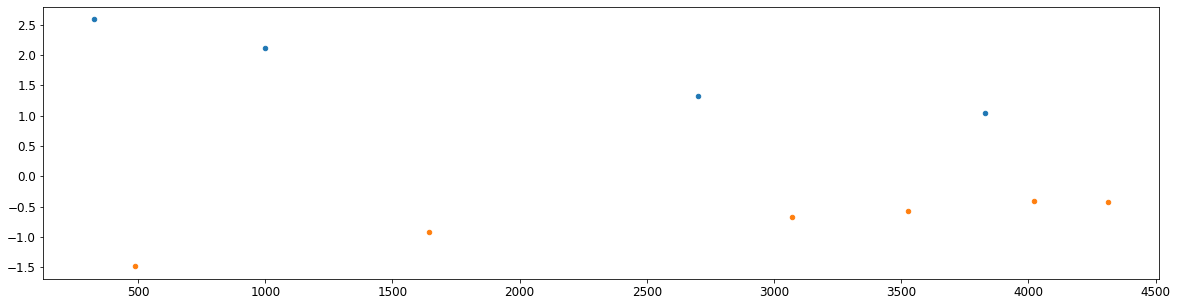

In [ ]:
#plot maxima and minima of the log mayer multiple

fig, ax = plt.subplots(figsize=(20,5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.scatter(mayer_highs.index, mayer_highs[0], s=20)
ax.scatter(mayer_lows.index, mayer_lows['log_mayer_multiple'], s=20)

In [ ]:
# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*np.exp(b*x)

# from https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

from scipy.optimize import curve_fit
x_top = mayer_highs.index
y_top = mayer_highs[0]

x_low = mayer_lows.index
y_low = mayer_lows['log_mayer_multiple']

#Fit the dummy exponential data
pars, cov = curve_fit(f=exponential, xdata=x_top, ydata=y_top, p0=[0, 0], bounds=(-np.inf, np.inf))

x_low = mayer_lows.index
y_low = mayer_lows['log_mayer_multiple']

#Fit the dummy exponential data
pars_low, cov_low = curve_fit(f=exponential, xdata=x_low, ydata=y_low, p0=[0, 0], bounds=(-np.inf, np.inf))




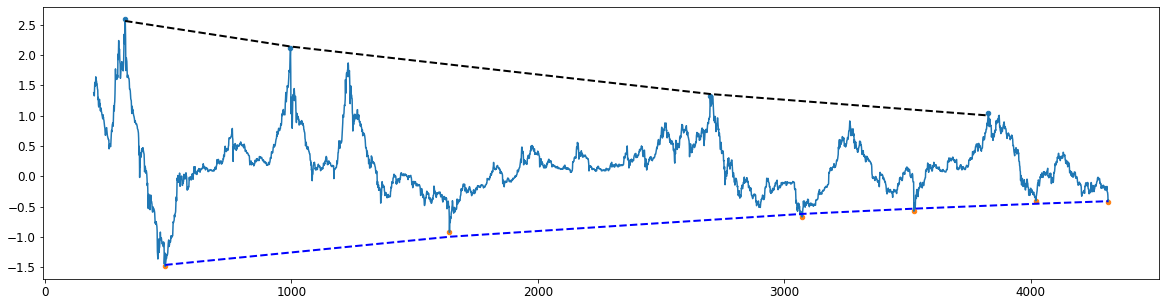

In [ ]:
# Plot the fit data as an overlay on the scatter data

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(np.log(df['mayer_multiple']))
ax.plot(x_top, exponential(x_top, *pars), linestyle='--', linewidth=2, color='black')
ax.plot(x_low, exponential(x_low, *pars_low), linestyle='--', linewidth=2, color='blue')
ax.scatter(mayer_highs.index, mayer_highs[0], s=20)
ax.scatter(mayer_lows.index, mayer_lows['log_mayer_multiple'], s=20)
plt.show()

In [ ]:
# define log top band and log lower band

x = df.index

df['log_mayer_topband'] = exponential(x, *pars)
df['log_mayer_lowerband'] = exponential(x, *pars_low)


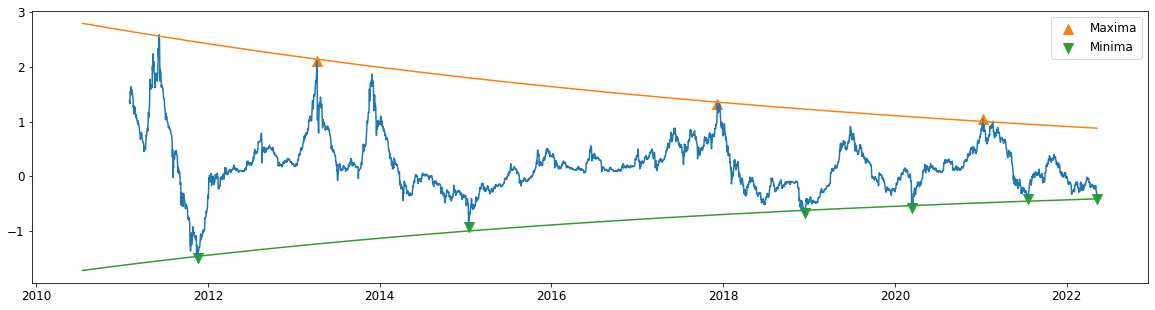

In [ ]:
# Plot the fit data as an overlay on the scatter data

#draw horizontal line across highs and lows

fig, ax = plt.subplots(figsize=(20,5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(df['date'],df['log_mayer_multiple'])
ax.scatter(df.iloc[mayer_max_idx]['date'], df.iloc[mayer_max_idx]['log_mayer_multiple'],
  label='Maxima', s=100, color=colors[1], marker='^')
ax.scatter(df.iloc[mayer_min_idx]['date'], df.iloc[mayer_min_idx]['log_mayer_multiple'],
  label='Minima', s=100, color=colors[2], marker='v')
ax.plot(df['date'],df['log_mayer_topband'])
ax.plot(df['date'],df['log_mayer_lowerband'])

ax.legend()

In [ ]:
#adjust mayer multiple to a drecreaseing range using min max normalization https://developers.google.com/machine-learning/data-prep/transform/normalization

adjusted_mayer_multiple_index = []

for i in range(len(df)):
    adjusted_mayer_multiple_index.append((df['log_mayer_multiple'][i]-df['log_mayer_lowerband'][i])/(df['log_mayer_topband'][i]-df['log_mayer_lowerband'][i]))
     

In [ ]:
# add new adjusted mayer multiple to main df

df['adjusted_mayer_multiple_index'] = adjusted_mayer_multiple_index

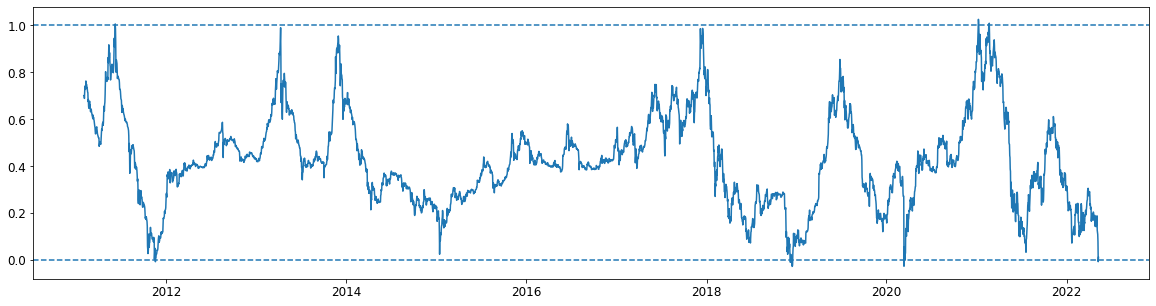

In [ ]:
# plot adjusted mayer index

fig, ax = plt.subplots(figsize=(20,5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(df['date'],df['adjusted_mayer_multiple_index'])
ax.axhline(0, linestyle = '--')
ax.axhline(1, linestyle = '--')

No handles with labels found to put in legend.


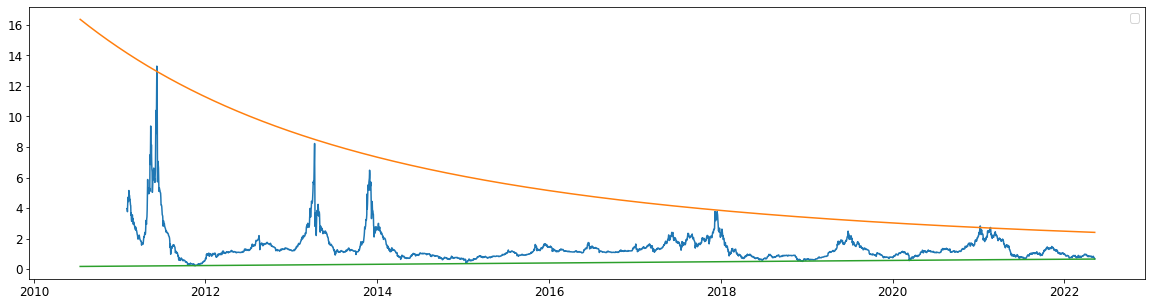

In [ ]:
#draw horizontal log line across highs and lows of the actual Mayer Multiple (using np.exp for the inverse of log)

fig, ax = plt.subplots(figsize=(20,5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(df['date'],np.exp(df['log_mayer_multiple']))
ax.plot(df['date'],np.exp(df['log_mayer_topband']))
ax.plot(df['date'],np.exp(df['log_mayer_lowerband']))

ax.legend()

In [ ]:
# calculate new mayer top and lower bands (inverse of log)

df['mayer_topband'] = np.exp(df['log_mayer_topband'])

df['mayer_lowerband'] = np.exp(df['log_mayer_lowerband'])

In [ ]:
# calculate price bands

df['price_MM_topband'] = df['200SMA']*df['mayer_topband']
df['price_MM_lowerband'] = df['200SMA']*df['mayer_lowerband']

#Work on Realized price

In [ ]:
# import realized price data from glassnode going back to 2013

# API key here
API_KEY = '' # insert your glassnode API KEY here

# report end dates

yesterday = dt.date.today() - dt.timedelta(days=1)
unixtimeyesterday = round(time.mktime(yesterday.timetuple()))

today = dt.date.today()
unixtimetoday = round(time.mktime(today.timetuple()))

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/market/price_realized_usd',
        params={'a': 'BTC', 'api_key': API_KEY, 's': '1278716400', 'u': unixtimetoday,
            'i': '24h','f':'JSON', 'timestamp_format':'unix'})

# convert to pandas dataframe
df_rp = pd.read_json(res.text)

#rename columns

df_rp = df_rp.rename(columns={'t':'date', 'v':'realized_price'})

# transform unix to UTC

df_rp['date'] = pd.to_datetime(df_rp['date'],unit='s')

In [ ]:
#add realized price data to the main dataframe

df['realized_price'] = df_rp['realized_price']

In [ ]:
# calcualte current price to realized price ratio

df['btcprice_realizedprice_ratio'] = df['close']/df['realized_price']

#Work on market cap to thermocap ratio

In [ ]:
# import market cap to thermo cap ratio data from glassnode going back to 2013

# API key here
API_KEY = '' #insert your glassnode API KEY here

# report end dates

yesterday = dt.date.today() - dt.timedelta(days=1)
unixtimeyesterday = round(time.mktime(yesterday.timetuple()))

today = dt.date.today()
unixtimetoday = round(time.mktime(today.timetuple()))

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/mining/marketcap_thermocap_ratio',
        params={'a': 'BTC', 'api_key': API_KEY, 's': '1278716400', 'u': unixtimetoday,
            'i': '24h','f':'JSON', 'timestamp_format':'unix'})

# convert to pandas dataframe
df_tc = pd.read_json(res.text)

In [ ]:
#rename columns thermocap

df_tc = df_tc.rename(columns={'t':'date', 'v':'marketcap_thermocap_ratio'})

# transform unix to UTC

df_tc['date'] = pd.to_datetime(df_tc['date'],unit='s')

In [ ]:
# add marketcap 2 thermocap 10-day moving average median to main df

df['marketcap_thermocap_ratio'] = df_tc['marketcap_thermocap_ratio']

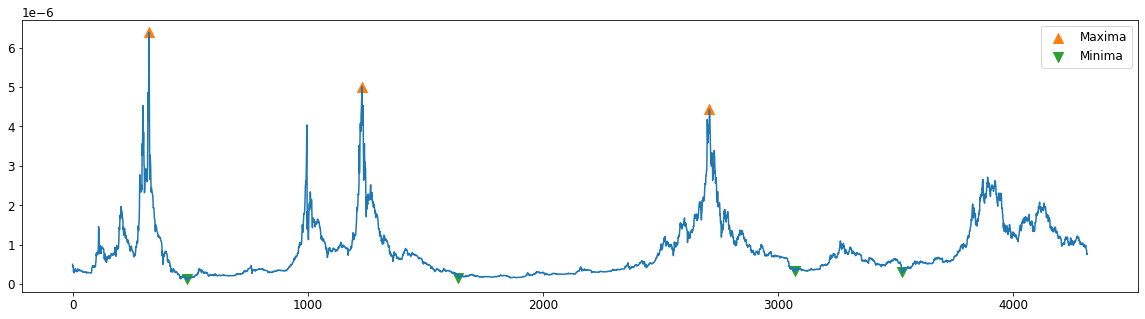

In [ ]:
# plot local maxima and minima using https://medium.com/raposa-technologies/higher-highs-lower-lows-and-calculating-price-trends-in-python-9bc9703f46a1

tc_max_idx = argrelextrema(df['marketcap_thermocap_ratio'].values, 
  np.greater, order=800)[0]
tc_min_idx = argrelextrema(df['marketcap_thermocap_ratio'].values, 
  np.less, order=400)[0]


fig, ax = plt.subplots(figsize=(20,5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(df['marketcap_thermocap_ratio'])
ax.scatter(df.iloc[tc_max_idx].index, df.iloc[tc_max_idx]['marketcap_thermocap_ratio'],
  label='Maxima', s=100, color=colors[1], marker='^')
ax.scatter(df.iloc[tc_min_idx].index, df.iloc[tc_min_idx]['marketcap_thermocap_ratio'],
  label='Minima', s=100, color=colors[2], marker='v')
ax.legend()

In [ ]:
# create pd series with log mayer multiple highs and lows

tc_highs = df.iloc[tc_max_idx]['marketcap_thermocap_ratio']
tc_lows = df.iloc[tc_min_idx]['marketcap_thermocap_ratio']

In [ ]:
# transform high and low series to dataframe, to then calculate a linear regression across them

tc_highs = pd.DataFrame(tc_highs)
tc_lows = pd.DataFrame(tc_lows)

In [ ]:
# draw trend lines http://techflare.blog/how-to-draw-a-trend-line-with-dataframe-in-python/
# use from scipy.stats import linregress

# calculate top band

slope, intercept, r_value, p_value, std_err = linregress(x=tc_highs.index, y=tc_highs['marketcap_thermocap_ratio'])
df['tc_topband'] = slope * df.index + intercept
df.tail()

# calculate lower band

slope, intercept, r_value, p_value, std_err = linregress(x=tc_lows.index, y=tc_lows['marketcap_thermocap_ratio'])
df['tc_lowerband'] = slope * df.index + intercept
df.tail()

,date,open,high,low,close,Two Crows,Three Black Crows,Three Inside Up/Down,Three-Line Strike,Three Outside Up/Down,...,adjusted_mayer_multiple_index,mayer_topband,mayer_lowerband,price_MM_topband,price_MM_lowerband,realized_price,btcprice_realizedprice_ratio,marketcap_thermocap_ratio,tc_topband,tc_lowerband
4311,2022-05-06,36566.667655,36580.241034,35509.211551,36054.160121,0,0,0,0,-100,...,0.118677,2.412543,0.662157,112675.751531,30925.474174,24549.647745,1.468622,8.810858e-07,0.000003,3.731350e-07
4312,2022-05-07,36039.538853,36124.561488,34944.427399,35542.908407,0,0,0,0,0,...,0.109937,2.411974,0.662247,112303.114440,30834.680365,24530.587531,1.448922,8.418328e-07,0.000003,3.732052e-07
4313,2022-05-08,35490.533652,35490.533652,33890.436592,33987.641361,0,0,0,0,0,...,0.077902,2.411405,0.662338,111890.702226,30732.886305,24523.018040,1.385949,7.519994e-07,0.000003,3.732755e-07
4314,2022-05-09,34070.852625,34203.515788,30339.983987,30384.579816,0,0,0,0,0,...,-0.006255,2.410837,0.662428,111478.585796,30631.090106,24510.566159,1.239652,7.668536e-07,0.000003,3.733457e-07
4315,2022-05-10,30187.990644,32596.307836,29978.213616,31007.755089,0,0,0,0,0,...,0.011848,2.410268,0.662519,111094.441748,30536.899406,24478.457388,1.266736,NaN,0.000003,3.734160e-07


#Work on Entity-Adjusted Dormancy Flow

In [ ]:
# import entity-adjusted dormancy flow data from glassnode going back to 2010

# API key here
API_KEY = '' # insert your glassnode API key here

# report end dates

#yesterday = dt.date.today() - dt.timedelta(days=1)
#unixtimeyesterday = round(time.mktime(yesterday.timetuple()))

today = dt.date.today()
unixtimetoday = round(time.mktime(today.timetuple()))

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/indicators/dormancy_flow',
        params={'a': 'BTC', 'api_key': API_KEY, 's': '1278716400', 'u': unixtimetoday,
            'i': '24h','f':'JSON', 'timestamp_format':'unix'})

# convert to pandas dataframe
df_dorflow = pd.read_json(res.text)

In [ ]:
# rename the columns

df_dorflow = df_dorflow.rename(columns={'t':'date','v':'dormancy_flow'})

# transform unix to UTC

df_dorflow['date'] = pd.to_datetime(df_dorflow['date'],unit='s')

In [ ]:
# add dormancy flow to main df

df['dormancy_flow'] = df_dorflow['dormancy_flow']

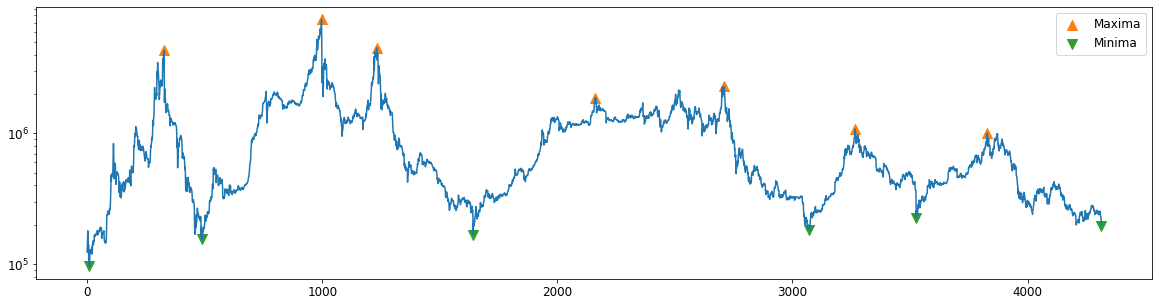

In [ ]:
# plot local maxima and minima using https://medium.com/raposa-technologies/higher-highs-lower-lows-and-calculating-price-trends-in-python-9bc9703f46a1

dorflow_max_idx = argrelextrema(df['dormancy_flow'].values, 
  np.greater, order=200)[0]
dorflow_min_idx = argrelextrema(df['dormancy_flow'].values, 
  np.less, order=300)[0]


fig, ax = plt.subplots(figsize=(20,5))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(df['dormancy_flow'])
ax.scatter(df.iloc[dorflow_max_idx].index, df.iloc[dorflow_max_idx]['dormancy_flow'],
  label='Maxima', s=100, color=colors[1], marker='^')
ax.scatter(df.iloc[dorflow_min_idx].index, df.iloc[dorflow_min_idx]['dormancy_flow'],
  label='Minima', s=100, color=colors[2], marker='v')
ax.set_yscale('log')
ax.legend()

#Work on Exchange net position change

In [ ]:
# import exchange net position change from glassnode going back to 2010

# API key here
API_KEY = '' #insert your glassnode API KEY here

# report end dates

#yesterday = dt.date.today() - dt.timedelta(days=1)
#unixtimeyesterday = round(time.mktime(yesterday.timetuple()))

today = dt.date.today()
unixtimetoday = round(time.mktime(today.timetuple()))

# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/distribution/exchange_net_position_change',
        params={'a': 'BTC', 'api_key': API_KEY, 's': '1278716400', 'u': unixtimetoday,
            'i': '24h','f':'JSON', 'timestamp_format':'unix'})

# convert to pandas dataframe
df_ex = pd.read_json(res.text)

In [ ]:
# rename the columns

df_ex = df_ex.rename(columns={'t':'date','v':'exchange_net_position_change'})

# transform unix to UTC

df_ex['date'] = pd.to_datetime(df_ex['date'],unit='s')

df_ex.head()

,date,exchange_net_position_change
0,2011-09-16,74.789093
1,2011-09-17,69.740065
2,2011-09-18,30.148647
3,2011-09-19,38.196675
4,2011-09-20,36.377675


In [ ]:
#Left join exchange net position change data to original dataframe

df = pd.merge(df, 
              df_ex, 
              on ='date', 
              how ='left')

Text(0.5, 0, 'Date')

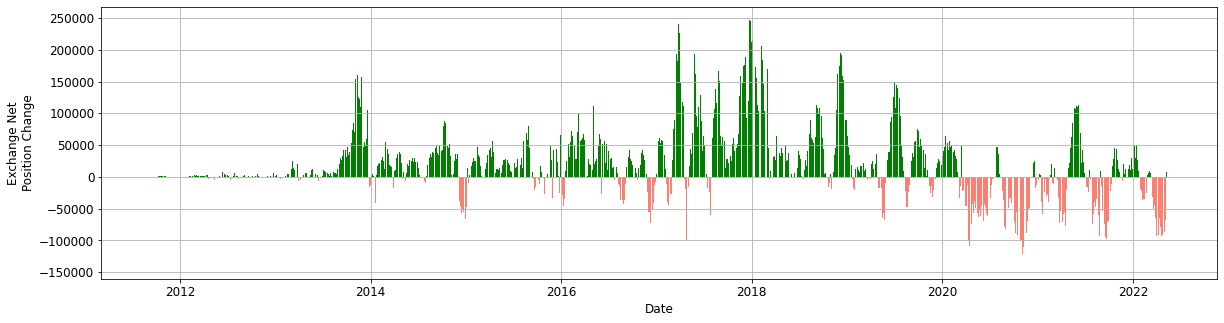

In [ ]:
# plot exchange_net_position_change

fig, ax = plt.subplots(figsize=(20,5))

x = df['date']
y_enpc = df['exchange_net_position_change']
enpc_0_plus = y_enpc.copy() # create two different lines for above one and below one
enpc_0_minus = y_enpc.copy()

enpc_0_plus[enpc_0_plus <= 0] = np.nan # convert numbers above and below to np.nan
enpc_0_minus[enpc_0_minus >= 0] = np.nan
ax.bar(x, enpc_0_plus, color='green')
ax.bar(x, enpc_0_minus, color='salmon')
ax.set_ylabel('Exchange Net\nPosition Change')
ax.grid(True)
ax.set_xlabel('Date')

#Import VIX data

In [ ]:
# import vix data

# Get the data for VIX by specifying the stock ticker, start date, and end date

yesterday = dt.date.today() - dt.timedelta(days=1)

df_vix = yf.download('^VIX','2010-07-17',yesterday)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# reset vix index

df_vix = df_vix.reset_index()

In [ ]:
# drop unnecesary columns

df_vix = df_vix.drop(['Adj Close', 'Volume'], axis = 1)

# rename columns

df_vix = df_vix.rename(columns={'Date':'date', 'Open': 'vix_open', 'High': 'vix_high', 'Low': 'vix_low',
                           'Close': 'vix_close'})

In [ ]:
#Left join VIX data to original dataframe

df = pd.merge(df, 
              df_vix, 
              on ='date', 
              how ='left')

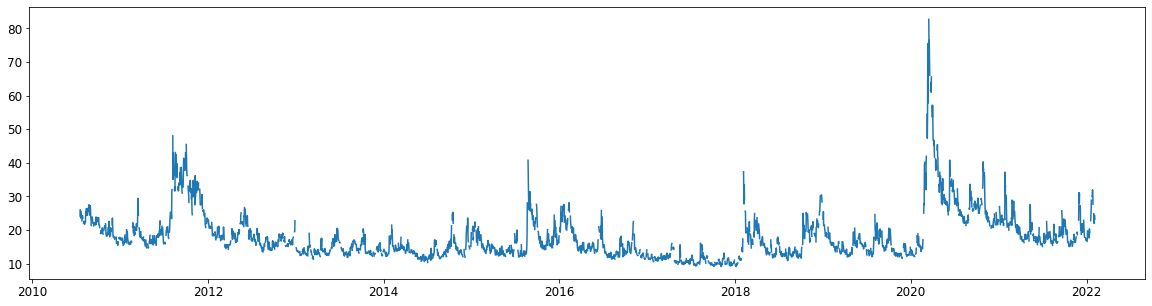

In [ ]:
# plot VIX

fig, ax = plt.subplots(figsize=(20,5))

ax.plot(df['date'],df['vix_close'])

#Work on 200W MA

In [ ]:
# add weekday to main df

df['weekday'] = df['date'].dt.dayofweek

In [ ]:
# calculate week date alternative approach

week_date = []
week_close = []

for i, (date, weekday, close) in enumerate(zip(df['date'], df['weekday'], df['close'])):
    if weekday == 0:
        week_date.append(date)
        week_close.append(close)

In [ ]:
# build new week df

week_dic = {'week_date': week_date, 'week_close': week_close}

weeks_df = pd.DataFrame(data=week_dic)

# calculate 200-week MA

twohundred__week_sma = weeks_df['week_close'].rolling(window=200).mean()

# append to the week dataframe

weeks_df['200_week_SMA'] = twohundred__week_sma

In [ ]:
# rename datefield before doing left join

weeks_df = weeks_df.rename(columns={'week_date':'date'})

# left join weekly closes and 200week SMA

df = pd.merge(df, 
              weeks_df, 
              on ='date', 
              how ='left')

In [ ]:
# fill empty values with the previous one https://stackoverflow.com/questions/27905295/how-to-replace-nans-by-preceding-or-next-values-in-pandas-dataframe

df['200_week_SMA'].fillna(method='ffill', inplace=True)
df['week_close'].fillna(method='ffill', inplace=True)

In [ ]:
# calculate price vs 200W SMA ratio

df['price_200WSMA_ratio'] = df['close']/df['200_week_SMA']

#Import CME Futures Data

In [ ]:
yesterday = dt.date.today() - dt.timedelta(days=1)

print(yesterday)

2022-05-10


In [ ]:
# import CME front month contract

df_cme = yf.download('BTC=F','2010-07-17',yesterday)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# reset vix index

df_cme = df_cme.reset_index()

In [ ]:
# drop unnecesary columns

df_cme = df_cme.drop(['Adj Close'], axis = 1)

In [ ]:
# rename columns

df_cme = df_cme.rename(columns={'Date':'date', 'Open': 'cme_open', 'High': 'cme_high', 'Low': 'cme_low',
                           'Close': 'cme_close', 'Volume':'cme_volume'})

In [ ]:
# add relevant moving averages before merging

df_cme['cme_close_SMA7'] = df_cme['cme_close'].rolling(window=7).mean()
df_cme['cme_close_SMA14'] = df_cme['cme_close'].rolling(window=14).mean()
df_cme['cme_close_SMA30'] = df_cme['cme_close'].rolling(window=30).mean()
df_cme['cme_close_SMA60'] = df_cme['cme_close'].rolling(window=60).mean()
df_cme['cme_close_SMA90'] = df_cme['cme_close'].rolling(window=90).mean()

df_cme['cme_close_EMA7'] = df_cme['cme_close'].ewm(span=7, adjust=False).mean()
df_cme['cme_close_EMA14'] = df_cme['cme_close'].ewm(span=14, adjust=False).mean()
df_cme['cme_close_EMA30'] = df_cme['cme_close'].ewm(span=30, adjust=False).mean()
df_cme['cme_close_EMA60'] = df_cme['cme_close'].ewm(span=60, adjust=False).mean()
df_cme['cme_close_EMA90'] = df_cme['cme_close'].ewm(span=90, adjust=False).mean()

df_cme['cme_volume_SMA7'] = df_cme['cme_volume'].rolling(window=7).mean()
df_cme['cme_volume_SMA14'] = df_cme['cme_volume'].rolling(window=14).mean()
df_cme['cme_volume_SMA30'] = df_cme['cme_volume'].rolling(window=30).mean()
df_cme['cme_volume_SMA60'] = df_cme['cme_volume'].rolling(window=60).mean()
df_cme['cme_volume_SMA90'] = df_cme['cme_volume'].rolling(window=90).mean()

df_cme['cme_volume_EMA7'] = df_cme['cme_volume'].ewm(span=7, adjust=False).mean()
df_cme['cme_volume_EMA14'] = df_cme['cme_volume'].ewm(span=14, adjust=False).mean()
df_cme['cme_volume_EMA30'] = df_cme['cme_volume'].ewm(span=30, adjust=False).mean()
df_cme['cme_volume_EMA60'] = df_cme['cme_volume'].ewm(span=60, adjust=False).mean()
df_cme['cme_volume_EMA90'] = df_cme['cme_volume'].ewm(span=90, adjust=False).mean()


In [ ]:
#Left join VIX data to original dataframe

df = pd.merge(df, 
              df_cme, 
              on ='date', 
              how ='left')

In [ ]:
# calculate cme futures premium vs actual price

df['cme_premium'] = df['cme_close']/df['close']

In [ ]:
# calculate CME Premium 30d EMA

df['cme_premium_EMA30'] = df['cme_premium'].ewm(span=30, adjust=False).mean()

#Import binance futures data

In [ ]:
# binance auth settings

user_key = '' #add your user key here
secret_key = '' # add your super secret key here
binance_client = Client(user_key, secret_key)

In [ ]:
#import binance data

df_binance = pd.DataFrame(binance_client.futures_historical_klines(
    symbol='BTCUSDT',
    interval='1d',
    start_str='2014-08-11',
    end_str=str(yesterday)
))
df_binance.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1567900800000,10000,10412.65,10000,10391.63,3096.291,1567987199999,32096280.44997,3754,0.039,393.35627,0
1,1567987200000,10316.62,10475.54,10077.22,10307,14824.373,1568073599999,152447209.57153,11296,5452.451,56197395.22191,0
2,1568073600000,10307,10382.97,9940.87,10102.02,9068.955,1568159999999,92717645.17470,10089,6395.462,65526356.95107,0
3,1568160000000,10094.27,10293.11,9884.31,10159.55,10897.922,1568246399999,109786235.83974,13811,7724.442,77841159.69945,0
4,1568246400000,10163.06,10450.13,10042.12,10415.13,15609.634,1568332799999,159494237.43414,20060,10117.798,103160660.48429,0


In [ ]:
# crop unnecessary columns
df_binance = df_binance.iloc[:, :6]
# ascribe names to columns
df_binance.columns = ['date', 'binance_open', 'binance_high', 'binance_low', 'binance_close', 'binance_volume']
# convert timestamp to date format and ensure ohlcv are all numeric

#convert key columns to int format

df_binance['binance_close'] = pd.to_numeric(df_binance['binance_close'])
df_binance['binance_volume'] = pd.to_numeric(df_binance['binance_close'])

df_binance.tail()

,date,binance_open,binance_high,binance_low,binance_close,binance_volume
971,1651795200000,36533.70,36679.30,35200.00,35995.3,35995.3
972,1651881600000,35995.20,36138.00,34700.00,35466.7,35466.7
973,1651968000000,35466.70,35504.00,33665.00,34032.0,34032.0
974,1652054400000,34032.10,34243.30,30003.60,30056.6,30056.6
975,1652140800000,30056.00,32650.00,29701.40,31002.1,31002.1


In [ ]:
df_binance['date'] = pd.to_datetime(df_binance['date'],unit='ms')

df_binance.tail()

,date,binance_open,binance_high,binance_low,binance_close,binance_volume
971,2022-05-06,36533.70,36679.30,35200.00,35995.3,35995.3
972,2022-05-07,35995.20,36138.00,34700.00,35466.7,35466.7
973,2022-05-08,35466.70,35504.00,33665.00,34032.0,34032.0
974,2022-05-09,34032.10,34243.30,30003.60,30056.6,30056.6
975,2022-05-10,30056.00,32650.00,29701.40,31002.1,31002.1


In [ ]:
# add relevant moving averages before merging

df_binance['binance_close_SMA7'] = df_binance['binance_close'].rolling(window=7).mean()
df_binance['binance_close_SMA14'] = df_binance['binance_close'].rolling(window=14).mean()
df_binance['binance_close_SMA30'] = df_binance['binance_close'].rolling(window=30).mean()
df_binance['binance_close_SMA60'] = df_binance['binance_close'].rolling(window=60).mean()
df_binance['binance_close_SMA90'] = df_binance['binance_close'].rolling(window=90).mean()

df_binance['binance_close_EMA7'] = df_binance['binance_close'].ewm(span=7, adjust=False).mean()
df_binance['binance_close_EMA14'] = df_binance['binance_close'].ewm(span=14, adjust=False).mean()
df_binance['binance_close_EMA30'] = df_binance['binance_close'].ewm(span=30, adjust=False).mean()
df_binance['binance_close_EMA60'] = df_binance['binance_close'].ewm(span=60, adjust=False).mean()
df_binance['binance_close_EMA90'] = df_binance['binance_close'].ewm(span=90, adjust=False).mean()

df_binance['binance_volume_SMA7'] = df_binance['binance_volume'].rolling(window=7).mean()
df_binance['binance_volume_SMA14'] = df_binance['binance_volume'].rolling(window=14).mean()
df_binance['binance_volume_SMA30'] = df_binance['binance_volume'].rolling(window=30).mean()
df_binance['binance_volume_SMA60'] = df_binance['binance_volume'].rolling(window=60).mean()
df_binance['binance_volume_SMA90'] = df_binance['binance_volume'].rolling(window=90).mean()

df_binance['binance_volume_EMA7'] = df_binance['binance_volume'].ewm(span=7, adjust=False).mean()
df_binance['binance_volume_EMA14'] = df_binance['binance_volume'].ewm(span=14, adjust=False).mean()
df_binance['binance_volume_EMA30'] = df_binance['binance_volume'].ewm(span=30, adjust=False).mean()
df_binance['binance_volume_EMA60'] = df_binance['binance_volume'].ewm(span=60, adjust=False).mean()
df_binance['binance_volume_EMA90'] = df_binance['binance_volume'].ewm(span=90, adjust=False).mean()


In [ ]:
#Left join binance data to original dataframe

df = pd.merge(df, 
              df_binance, 
              on ='date', 
              how ='left')

In [ ]:
# calculate binance futures premium vs actual price

df['binance_premium'] = df['binance_close']/df['close']

In [ ]:
# calculate moving averages for bitcoin premium

df['binance_premium_SMA3'] = df['binance_premium'].rolling(window=3).mean()
df['binance_premium_SMA7'] = df['binance_premium'].rolling(window=7).mean()
df['binance_premium_SMA14'] = df['binance_premium'].rolling(window=14).mean()
df['binance_premium_SMA30'] = df['binance_premium'].rolling(window=30).mean()
df['binance_premium_SMA90'] = df['binance_premium'].rolling(window=90).mean()


df['binance_premium_EMA3'] = df['binance_premium'].ewm(span=3, adjust=False).mean()
df['binance_premium_EMA7'] = df['binance_premium'].ewm(span=7, adjust=False).mean()
df['binance_premium_EMA14'] = df['binance_premium'].ewm(span=14, adjust=False).mean()
df['binance_premium_EMA30'] = df['binance_premium'].ewm(span=30, adjust=False).mean()
df['binance_premium_EMA90'] = df['binance_premium'].ewm(span=90, adjust=False).mean()


#Visualizations

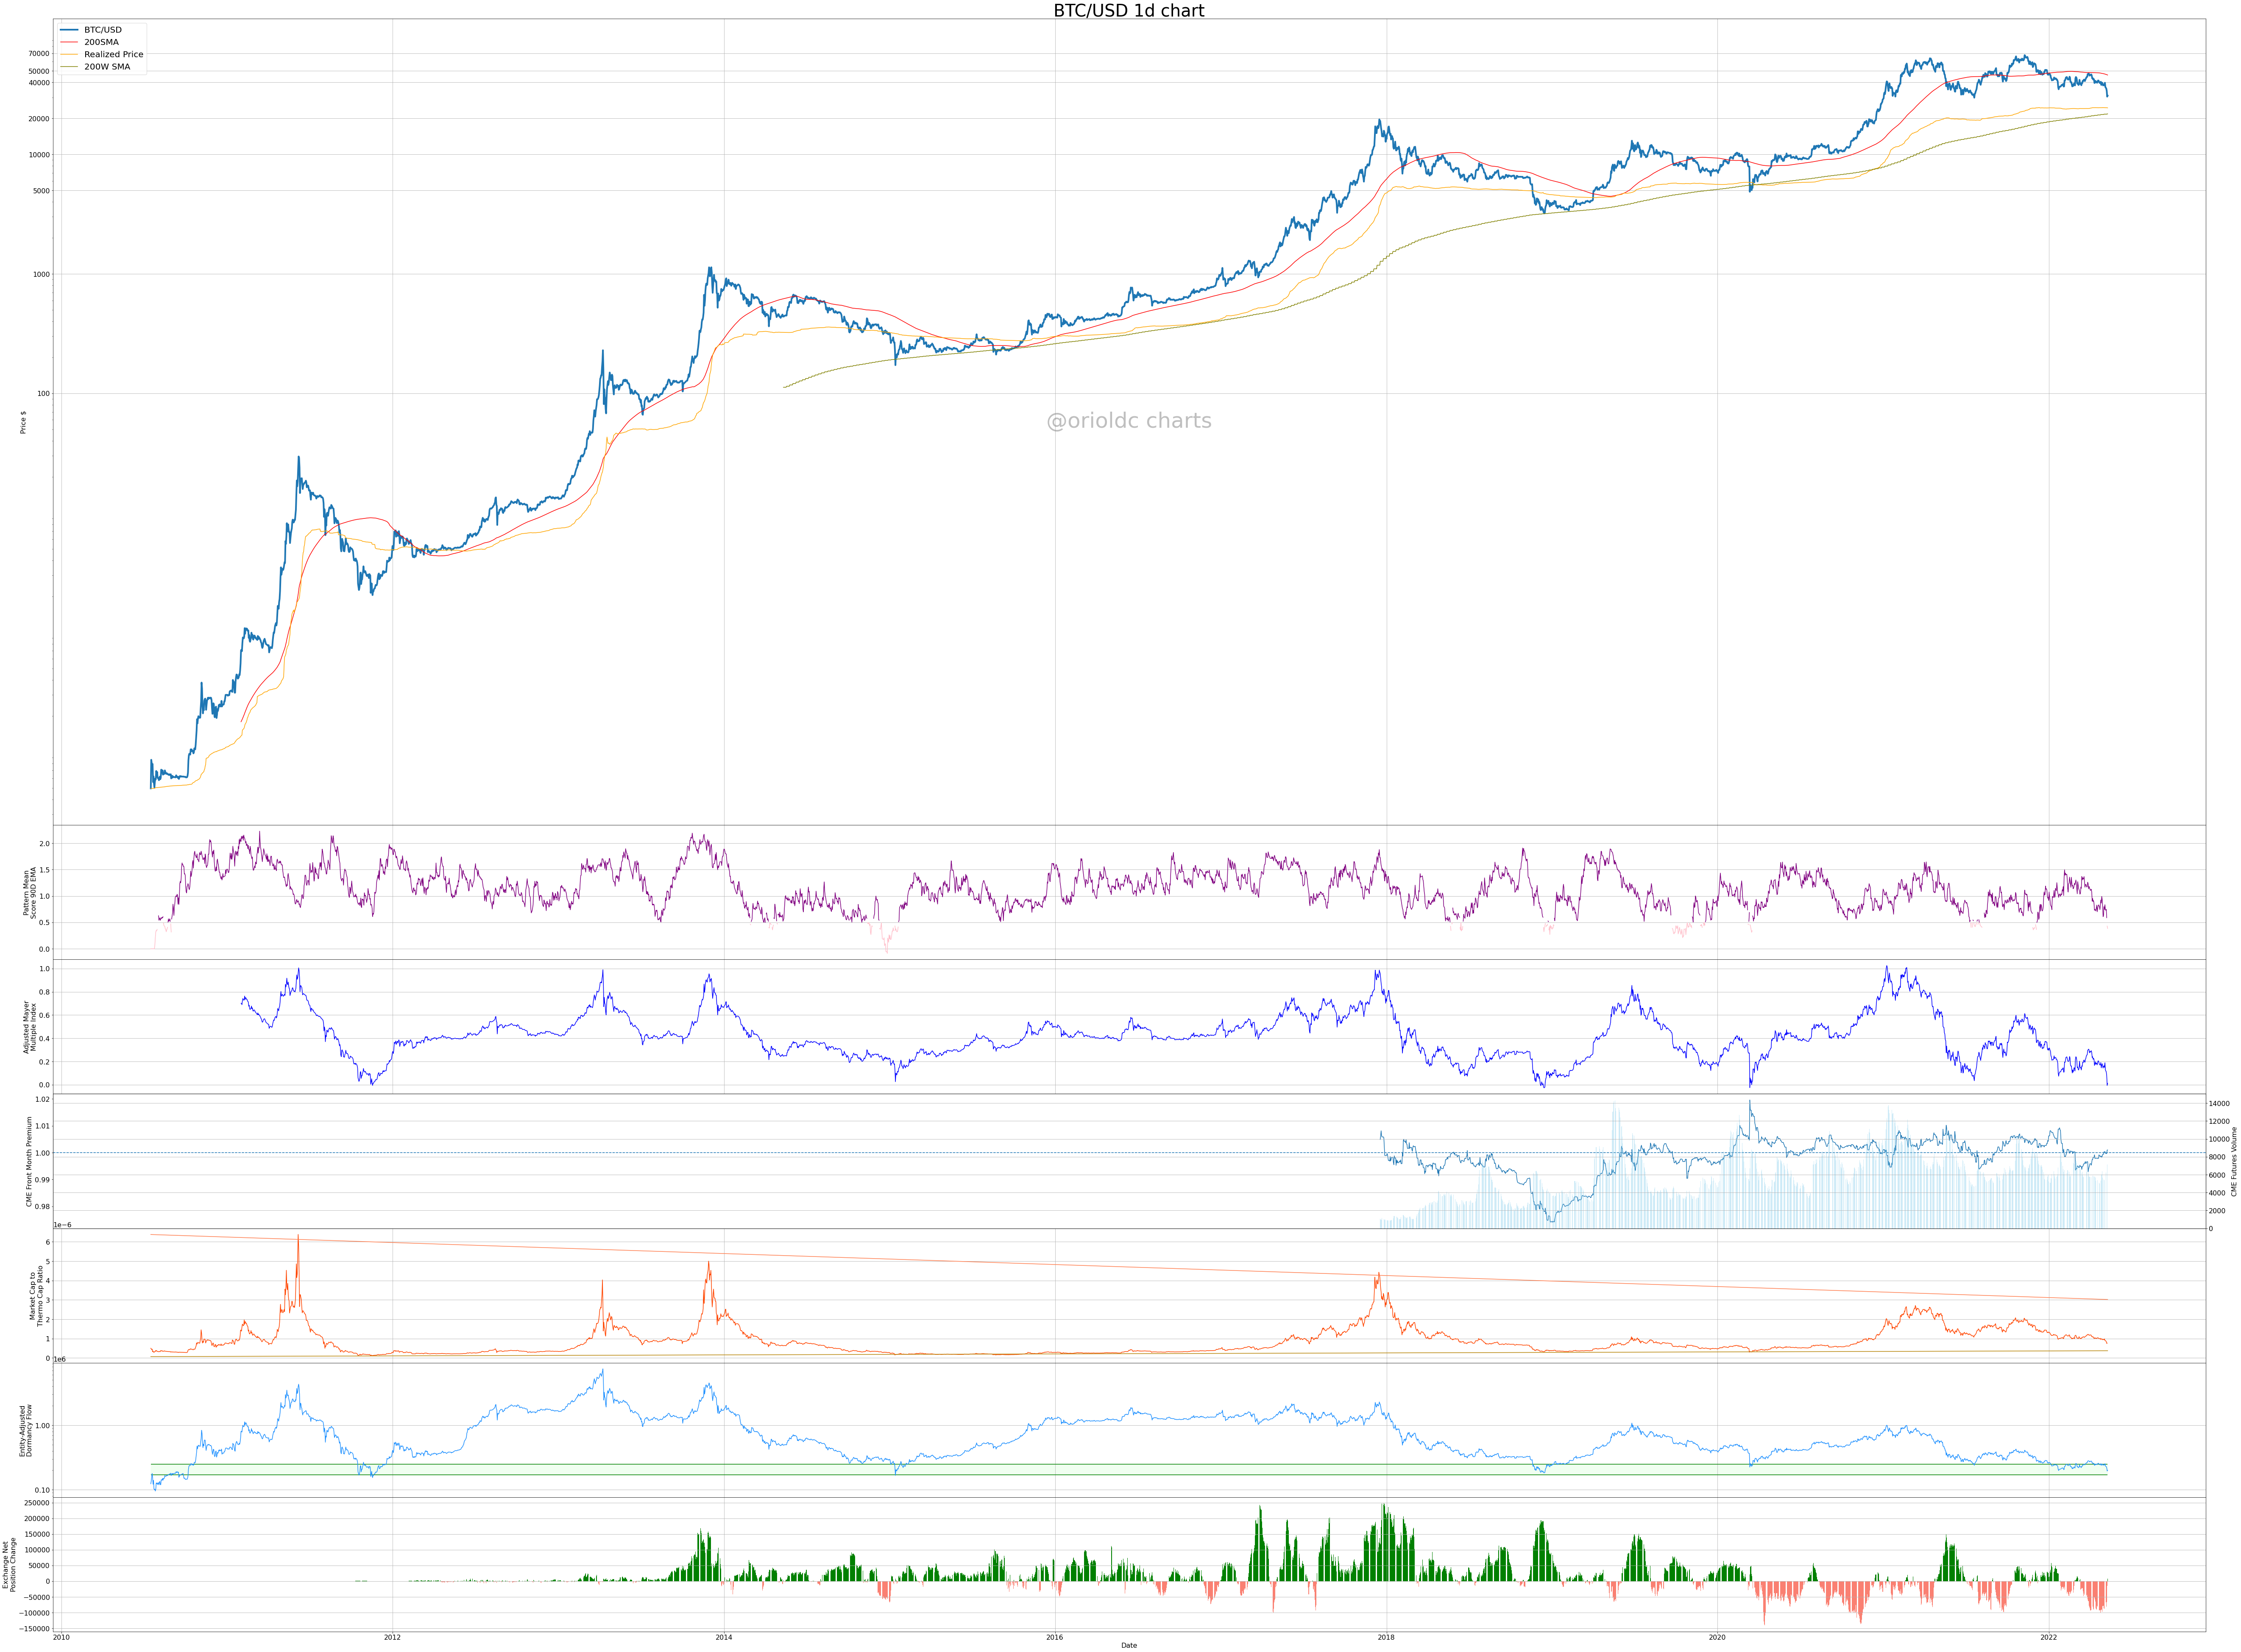

In [ ]:
# visualizing the data so far using matplotlib

plt.rc('font', size=16)

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(7,1, sharex=True, 
                                                        gridspec_kw={'height_ratios': [6,1,1,1,1,1,1]},
                                                        figsize=(91,70))

x = df['date']

ticks = [100, 1000, 5000, 10000, 20000, 40000, 50000, 70000]

labels = ['BTC/USD', '200SMA', 'Realized Price','200W SMA']

yesterday = dt.date.today() - dt.timedelta(days=1)

filename = 'BtcUsd_1d_onchain_futures_v1_{}.jpg'.format(yesterday)

# plot price, 200-SMA, realized price, 200W MA

ax0.plot(x, df['close'], linewidth = 4)
ax0.plot(x, df['200SMA'], color='red')
ax0.plot(x, df['realized_price'], color='orange')
ax0.plot(x, df['200_week_SMA'], color='olive')
ax0.text(0.5, 0.5, '@orioldc charts', transform=ax0.transAxes,
        fontsize=50, color='gray', alpha=0.5,
        ha='center', va='center')
ax0.set_yscale('log')
ax0.set_yticks(ticks, minor=False)
ax0.yaxis.set_major_formatter(ScalarFormatter()) # removes scientific notation from y-axis
#ax0.set_ticks(ticks, minor=True)
ax0.set_ylabel('Price $')
ax0.set_title('BTC/USD 1d chart', size=40)
ax0.legend(labels, loc='upper left', prop={'size': 20})
ax0.grid(True)

# plot pattern mean score

y_pms = df['pattern_mean_score_90D_EMA']
pms_05_plus = y_pms.copy() # create two different lines for above one and below one
pms_05_minus = y_pms.copy()
pms_05_plus[pms_05_plus <= 0.5] = np.nan # convert numbers above and below to np.nan
pms_05_minus[pms_05_plus >= 0.5] = np.nan
ax1.plot(x, pms_05_plus, color='purple')
ax1.plot(x, pms_05_minus, color='pink')
ax1.set_ylabel('Pattern Mean\nScore 90D EMA')
ax1.grid(True)

# plot mayer mutliple index

ax2.plot(x, df['adjusted_mayer_multiple_index'], color='blue')
ax2.set_ylabel('Adjusted Mayer\nMultiple Index')
ax2.grid(True)

#cme front month futures

ax35 = ax3.twinx()
ax3.plot(df['date'],df['cme_premium_EMA30'])
ax3.set_ylabel('CME Front Month Premium')
ax3.axhline(1, linestyle='--')
ax35.bar(df['date'], df['cme_volume_EMA14'], width=0.8, color='skyblue', alpha=0.4)
ax35.set_ylabel('CME Futures Volume')
ax35.set_xlabel('Date')
ax35.grid(True)

# plot market cap to thermocap ratio

ax4.plot(x,df['marketcap_thermocap_ratio'], color='orangered')
ax4.plot(x,df['tc_topband'], color='coral')
ax4.plot(x,df['tc_lowerband'], color='darkgoldenrod')
ax4.set_ylabel('Market Cap to\nThermo Cap Ratio')
ax4.grid(True)


# plot entity-adjusted dormancy flow

ax5.plot(x,df['dormancy_flow'], color='dodgerblue')
ax5.set_yscale('log')
ax5.yaxis.set_major_formatter(ScalarFormatter())
ax5.hlines(170000,x.min(),x.max(), color='green')
ax5.hlines(250000,x.min(),x.max(), color='green')
ax5.fill_between(x, 170000,250000, color='honeydew')
ax5.set_ylabel('Entity-Adjusted\nDormancy Flow')
ax5.grid(True)

# plot exchange net positon change

y_enpc = df['exchange_net_position_change']
enpc_0_plus = y_enpc.copy() # create two different lines for above one and below one
enpc_0_minus = y_enpc.copy()
enpc_0_plus[enpc_0_plus <= 0] = np.nan # convert numbers above and below to np.nan
enpc_0_minus[enpc_0_minus >= 0] = np.nan
ax6.bar(x, enpc_0_plus, color='green')
ax6.bar(x, enpc_0_minus, color='salmon')
ax6.set_ylabel('Exchange Net\nPosition Change')
ax6.grid(True)
ax6.set_xlabel('Date')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
plt.savefig(filename, facecolor='white', dpi=96)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

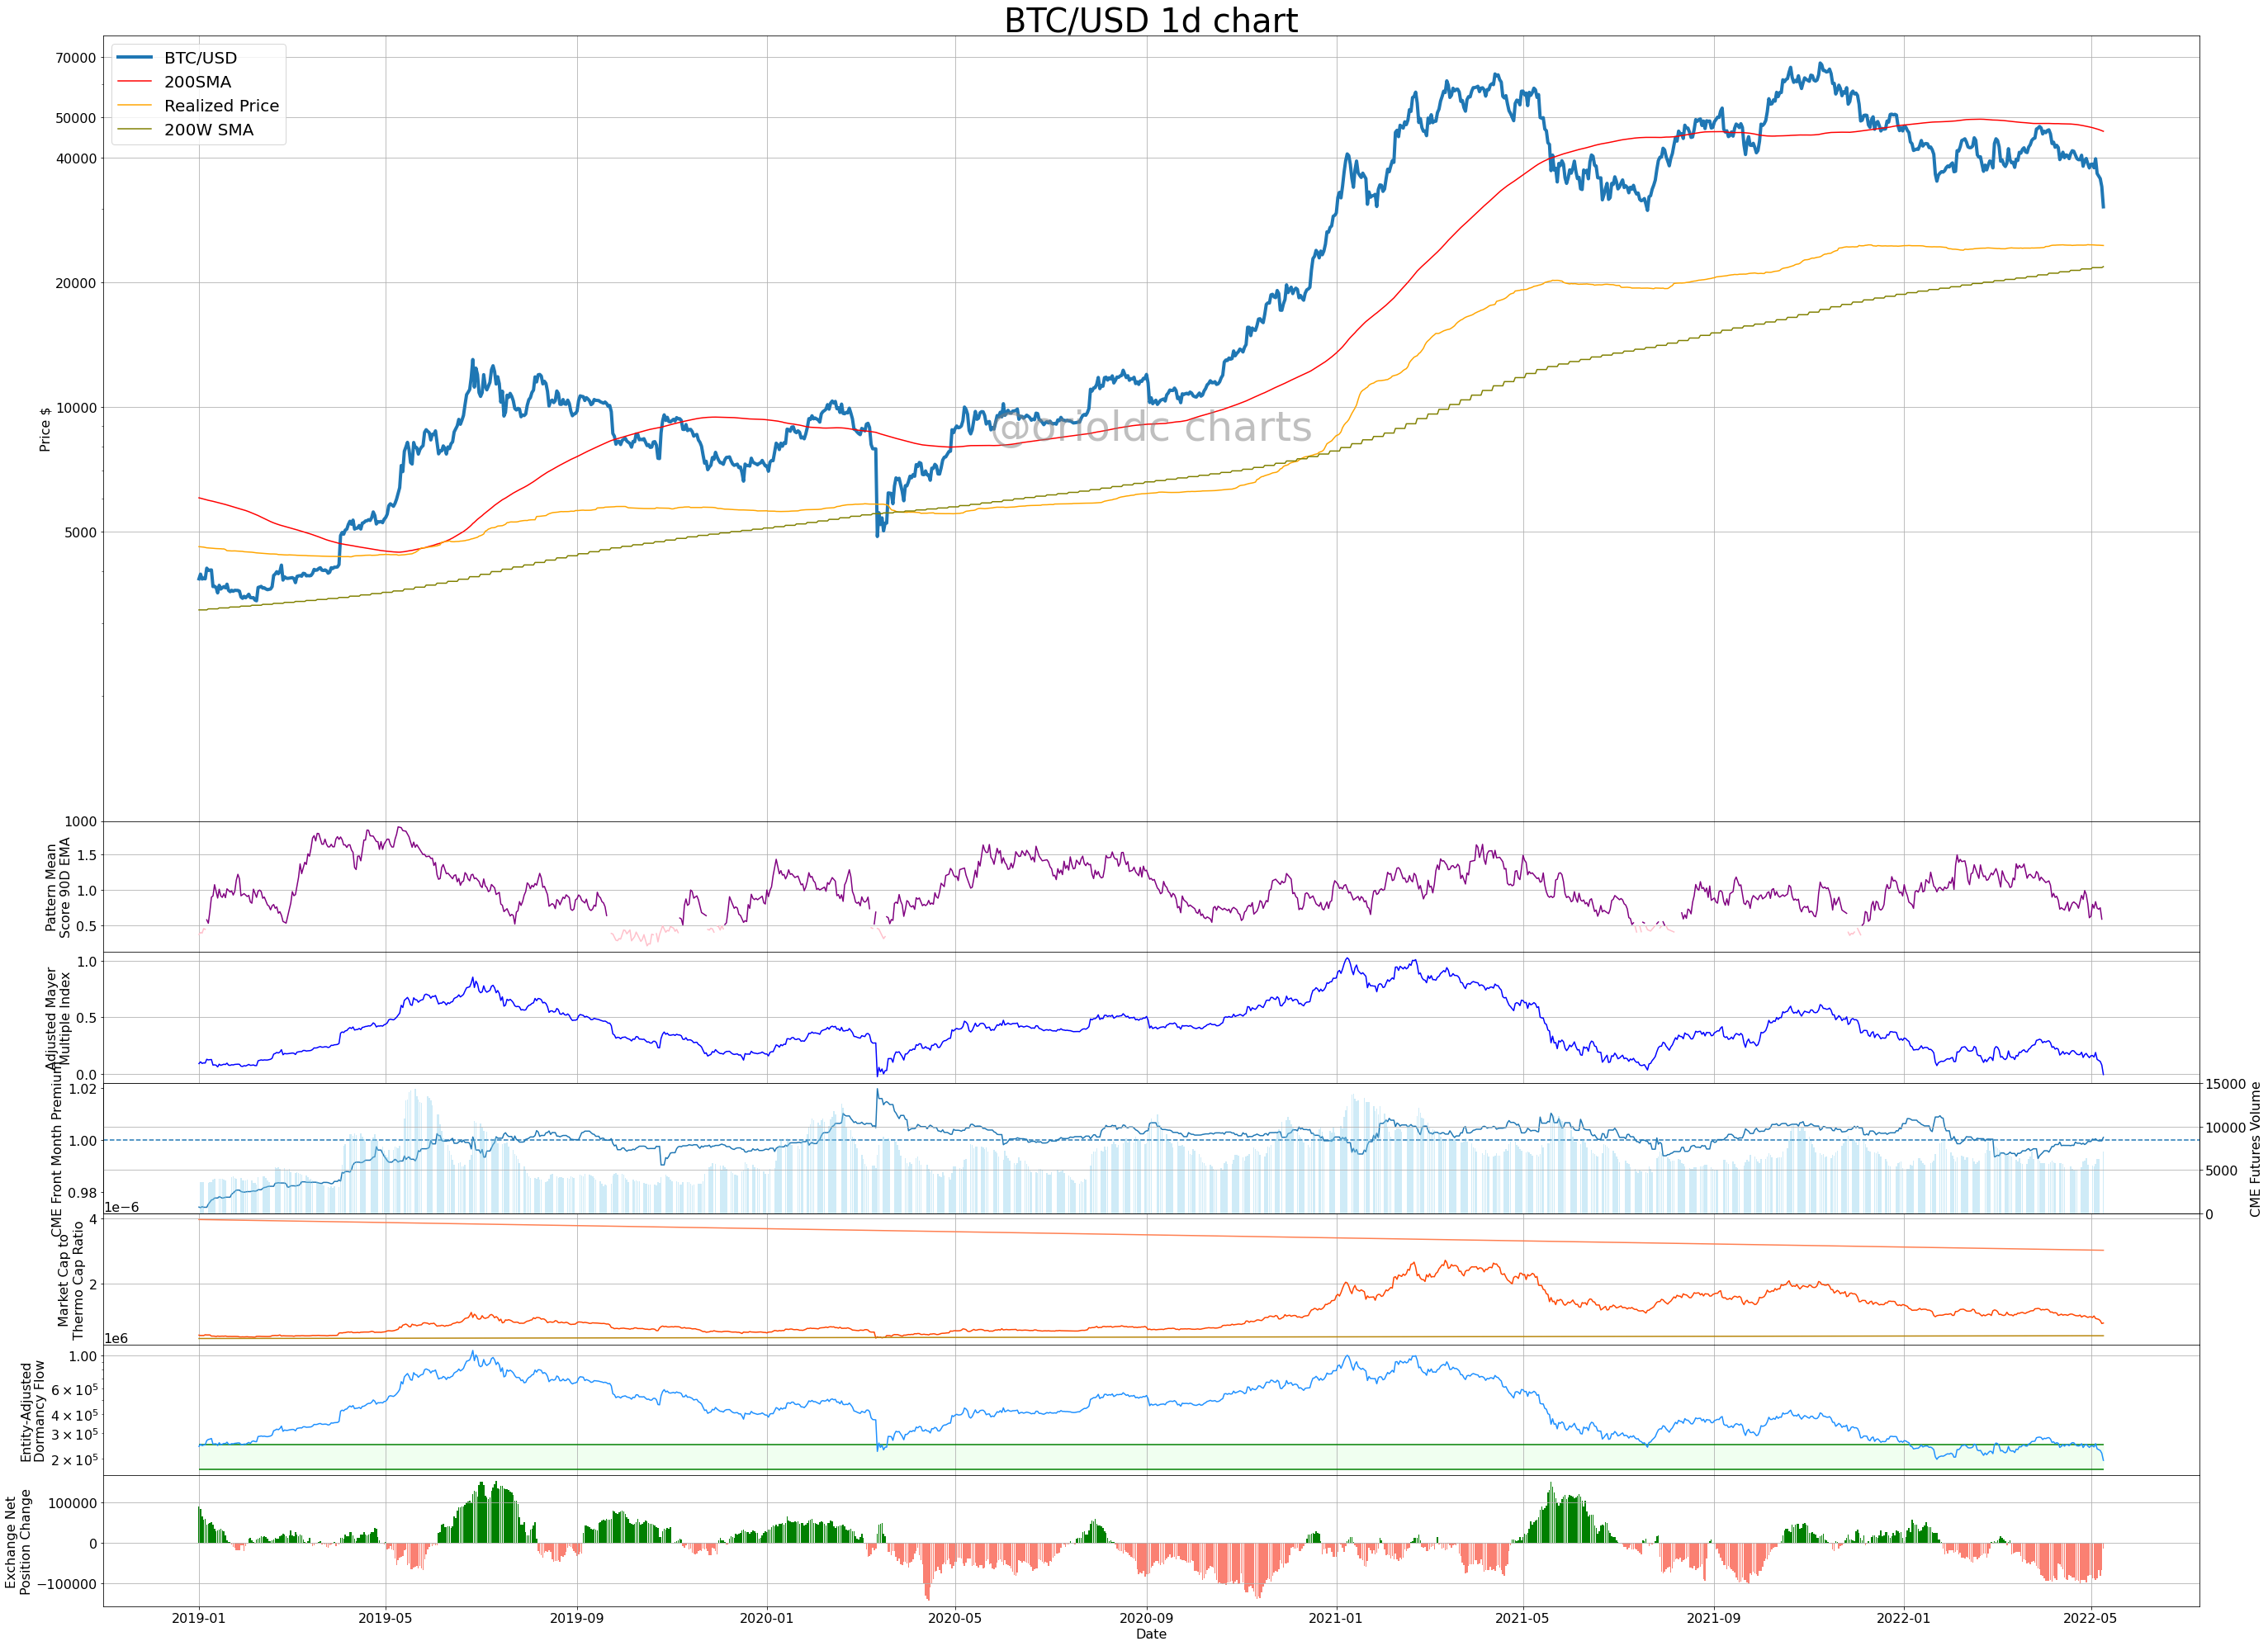

In [ ]:
# visualizing the data so far using matplotlib

# Filter data between two dates
df_2019 = df.loc[(df['date'] >= '2019-01-01')
                     & (df['date'] < str(yesterday))]


plt.rc('font', size=16)

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(7,1, sharex=True, 
                                                        gridspec_kw={'height_ratios': [6,1,1,1,1,1,1]},
                                                        figsize=(45.5,35))

x = df_2019['date']

ticks = [1000, 5000, 10000, 20000, 40000, 50000, 70000]

labels = ['BTC/USD', '200SMA', 'Realized Price','200W SMA']

yesterday = dt.date.today() - dt.timedelta(days=1)

filename = 'BtcUsd_1d_onchain_futures_v1_2019_{}.jpg'.format(yesterday)

# plot price, 200-SMA, realized price, 200W MA

ax0.plot(x, df_2019['close'], linewidth = 4)
ax0.plot(x, df_2019['200SMA'], color='red')
ax0.plot(x, df_2019['realized_price'], color='orange')
ax0.plot(x, df_2019['200_week_SMA'], color='olive')
ax0.text(0.5, 0.5, '@orioldc charts', transform=ax0.transAxes,
        fontsize=50, color='gray', alpha=0.5,
        ha='center', va='center')
ax0.set_yscale('log')
ax0.set_yticks(ticks, minor=False)
ax0.yaxis.set_major_formatter(ScalarFormatter()) # removes scientific notation from y-axis
#ax0.set_ticks(ticks, minor=True)
ax0.set_ylabel('Price $')
ax0.set_title('BTC/USD 1d chart', size=40)
ax0.legend(labels, loc='upper left', prop={'size': 20})
ax0.grid(True)

# plot pattern mean score

y_pms = df_2019['pattern_mean_score_90D_EMA']
pms_05_plus = y_pms.copy() # create two different lines for above one and below one
pms_05_minus = y_pms.copy()
pms_05_plus[pms_05_plus <= 0.5] = np.nan # convert numbers above and below to np.nan
pms_05_minus[pms_05_plus >= 0.5] = np.nan
ax1.plot(x, pms_05_plus, color='purple')
ax1.plot(x, pms_05_minus, color='pink')
ax1.set_ylabel('Pattern Mean\nScore 90D EMA')
ax1.grid(True)

# plot mayer mutliple index

ax2.plot(x, df_2019['adjusted_mayer_multiple_index'], color='blue')
ax2.set_ylabel('Adjusted Mayer\nMultiple Index')
ax2.grid(True)

#cme front month futures

ax35 = ax3.twinx()
ax3.plot(x,df_2019['cme_premium_EMA30'])
ax3.set_ylabel('CME Front Month Premium')
ax3.axhline(1, linestyle='--')
ax35.bar(x, df_2019['cme_volume_EMA14'], width=0.8, color='skyblue', alpha=0.4)
ax35.set_ylabel('CME Futures Volume')
ax35.set_xlabel('Date')
ax35.grid(True)

# plot market cap to thermocap ratio

ax4.plot(x,df_2019['marketcap_thermocap_ratio'], color='orangered')
ax4.plot(x,df_2019['tc_topband'], color='coral')
ax4.plot(x,df_2019['tc_lowerband'], color='darkgoldenrod')
ax4.set_ylabel('Market Cap to\nThermo Cap Ratio')
ax4.grid(True)


# plot entity-adjusted dormancy flow

ax5.plot(x,df_2019['dormancy_flow'], color='dodgerblue')
ax5.set_yscale('log')
ax5.yaxis.set_major_formatter(ScalarFormatter())
ax5.hlines(170000,x.min(),x.max(), color='green')
ax5.hlines(250000,x.min(),x.max(), color='green')
ax5.fill_between(x, 170000,250000, color='honeydew')
ax5.set_ylabel('Entity-Adjusted\nDormancy Flow')
ax5.grid(True)

# plot exchange net positon change

y_enpc = df_2019['exchange_net_position_change']
enpc_0_plus = y_enpc.copy() # create two different lines for above one and below one
enpc_0_minus = y_enpc.copy()
enpc_0_plus[enpc_0_plus <= 0] = np.nan # convert numbers above and below to np.nan
enpc_0_minus[enpc_0_minus >= 0] = np.nan
ax6.bar(x, enpc_0_plus, color='green')
ax6.bar(x, enpc_0_minus, color='salmon')
ax6.set_ylabel('Exchange Net\nPosition Change')
ax6.grid(True)
ax6.set_xlabel('Date')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)

#save image as file
from google.colab import files
plt.savefig(filename, facecolor='white', dpi=96)
files.download(filename) 
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

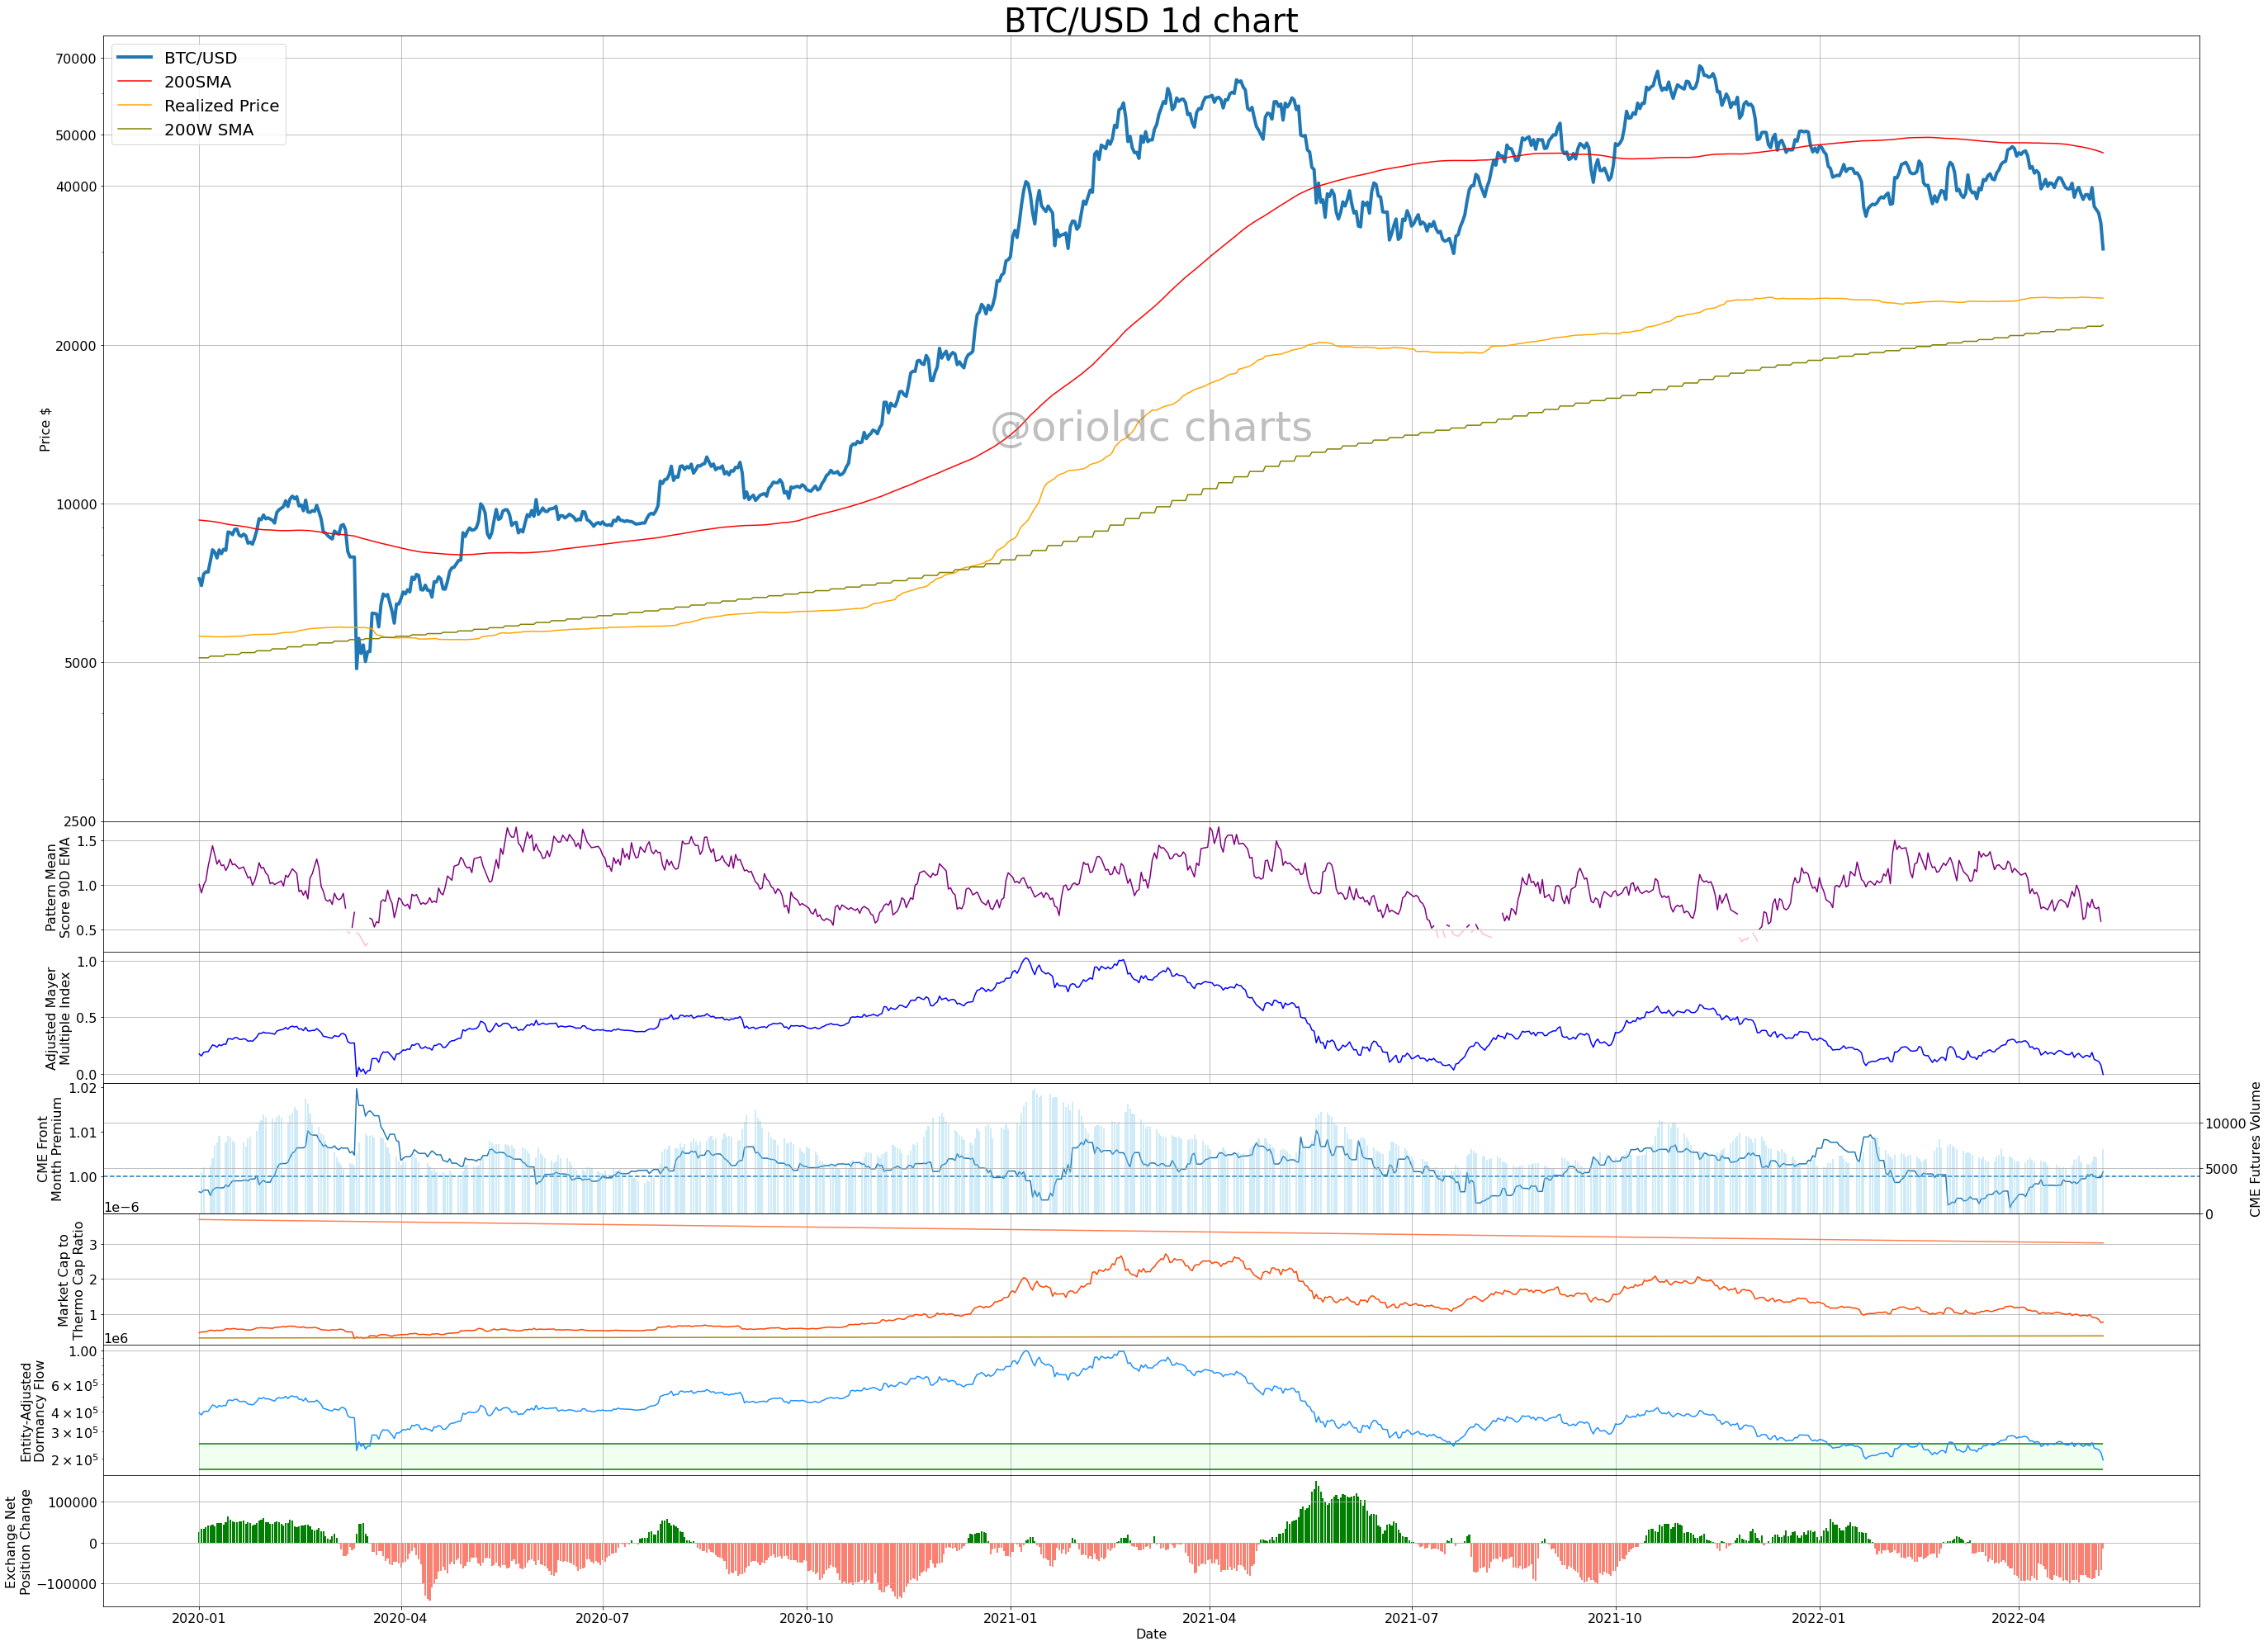

In [ ]:
# visualizing the data so far using matplotlib

# Filter data between two dates
df_2020 = df.loc[(df['date'] >= '2020-01-01')
                     & (df['date'] < str(yesterday))]


plt.rc('font', size=16)

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(7,1, sharex=True, 
                                                        gridspec_kw={'height_ratios': [6,1,1,1,1,1,1]},
                                                        figsize=(45.5,35))

x = df_2020['date']

ticks = [2500, 5000, 10000, 20000, 40000, 50000, 70000]

labels = ['BTC/USD', '200SMA', 'Realized Price','200W SMA']

yesterday = dt.date.today() - dt.timedelta(days=1)

filename = 'BtcUsd_1d_onchain_futures_v1_2020_{}.jpg'.format(yesterday)

# plot price, 200-SMA, realized price, 200W MA

ax0.plot(x, df_2020['close'], linewidth = 4)
ax0.plot(x, df_2020['200SMA'], color='red')
ax0.plot(x, df_2020['realized_price'], color='orange')
ax0.plot(x, df_2020['200_week_SMA'], color='olive')
ax0.text(0.5, 0.5, '@orioldc charts', transform=ax0.transAxes,
        fontsize=50, color='gray', alpha=0.5,
        ha='center', va='center')
ax0.set_yscale('log')
ax0.set_yticks(ticks, minor=False)
ax0.yaxis.set_major_formatter(ScalarFormatter()) # removes scientific notation from y-axis
#ax0.set_ticks(ticks, minor=True)
ax0.set_ylabel('Price $')
ax0.set_title('BTC/USD 1d chart', size=40)
ax0.legend(labels, loc='upper left', prop={'size': 20})
ax0.grid(True)

# plot pattern mean score

y_pms = df_2020['pattern_mean_score_90D_EMA']
pms_05_plus = y_pms.copy() # create two different lines for above one and below one
pms_05_minus = y_pms.copy()
pms_05_plus[pms_05_plus <= 0.5] = np.nan # convert numbers above and below to np.nan
pms_05_minus[pms_05_plus >= 0.5] = np.nan
ax1.plot(x, pms_05_plus, color='purple')
ax1.plot(x, pms_05_minus, color='pink')
ax1.set_ylabel('Pattern Mean\nScore 90D EMA')
ax1.grid(True)

# plot mayer mutliple index

ax2.plot(x, df_2020['adjusted_mayer_multiple_index'], color='blue')
ax2.set_ylabel('Adjusted Mayer\nMultiple Index')
ax2.grid(True)

#cme front month futures

ax35 = ax3.twinx()
ax3.plot(x,df_2020['cme_premium_EMA30'])
ax3.set_ylabel('CME Front\nMonth Premium')
ax3.axhline(1, linestyle='--')
ax35.bar(x, df_2020['cme_volume_EMA14'], width=0.8, color='skyblue', alpha=0.4)
ax35.set_ylabel('CME Futures Volume')
ax35.set_xlabel('Date')
ax35.grid(True)

# plot market cap to thermocap ratio

ax4.plot(x,df_2020['marketcap_thermocap_ratio'], color='orangered')
ax4.plot(x,df_2020['tc_topband'], color='coral')
ax4.plot(x,df_2020['tc_lowerband'], color='darkgoldenrod')
ax4.set_ylabel('Market Cap to\nThermo Cap Ratio')
ax4.grid(True)


# plot entity-adjusted dormancy flow

ax5.plot(x,df_2020['dormancy_flow'], color='dodgerblue')
ax5.set_yscale('log')
ax5.yaxis.set_major_formatter(ScalarFormatter())
ax5.hlines(170000,x.min(),x.max(), color='green')
ax5.hlines(250000,x.min(),x.max(), color='green')
ax5.fill_between(x, 170000,250000, color='honeydew')
ax5.set_ylabel('Entity-Adjusted\nDormancy Flow')
ax5.grid(True)

# plot exchange net positon change

y_enpc = df_2020['exchange_net_position_change']
enpc_0_plus = y_enpc.copy() # create two different lines for above one and below one
enpc_0_minus = y_enpc.copy()
enpc_0_plus[enpc_0_plus <= 0] = np.nan # convert numbers above and below to np.nan
enpc_0_minus[enpc_0_minus >= 0] = np.nan
ax6.bar(x, enpc_0_plus, color='green')
ax6.bar(x, enpc_0_minus, color='salmon')
ax6.set_ylabel('Exchange Net\nPosition Change')
ax6.grid(True)
ax6.set_xlabel('Date')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)

#save image as file
from google.colab import files
plt.savefig(filename, facecolor='white', dpi=96)
files.download(filename) 
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

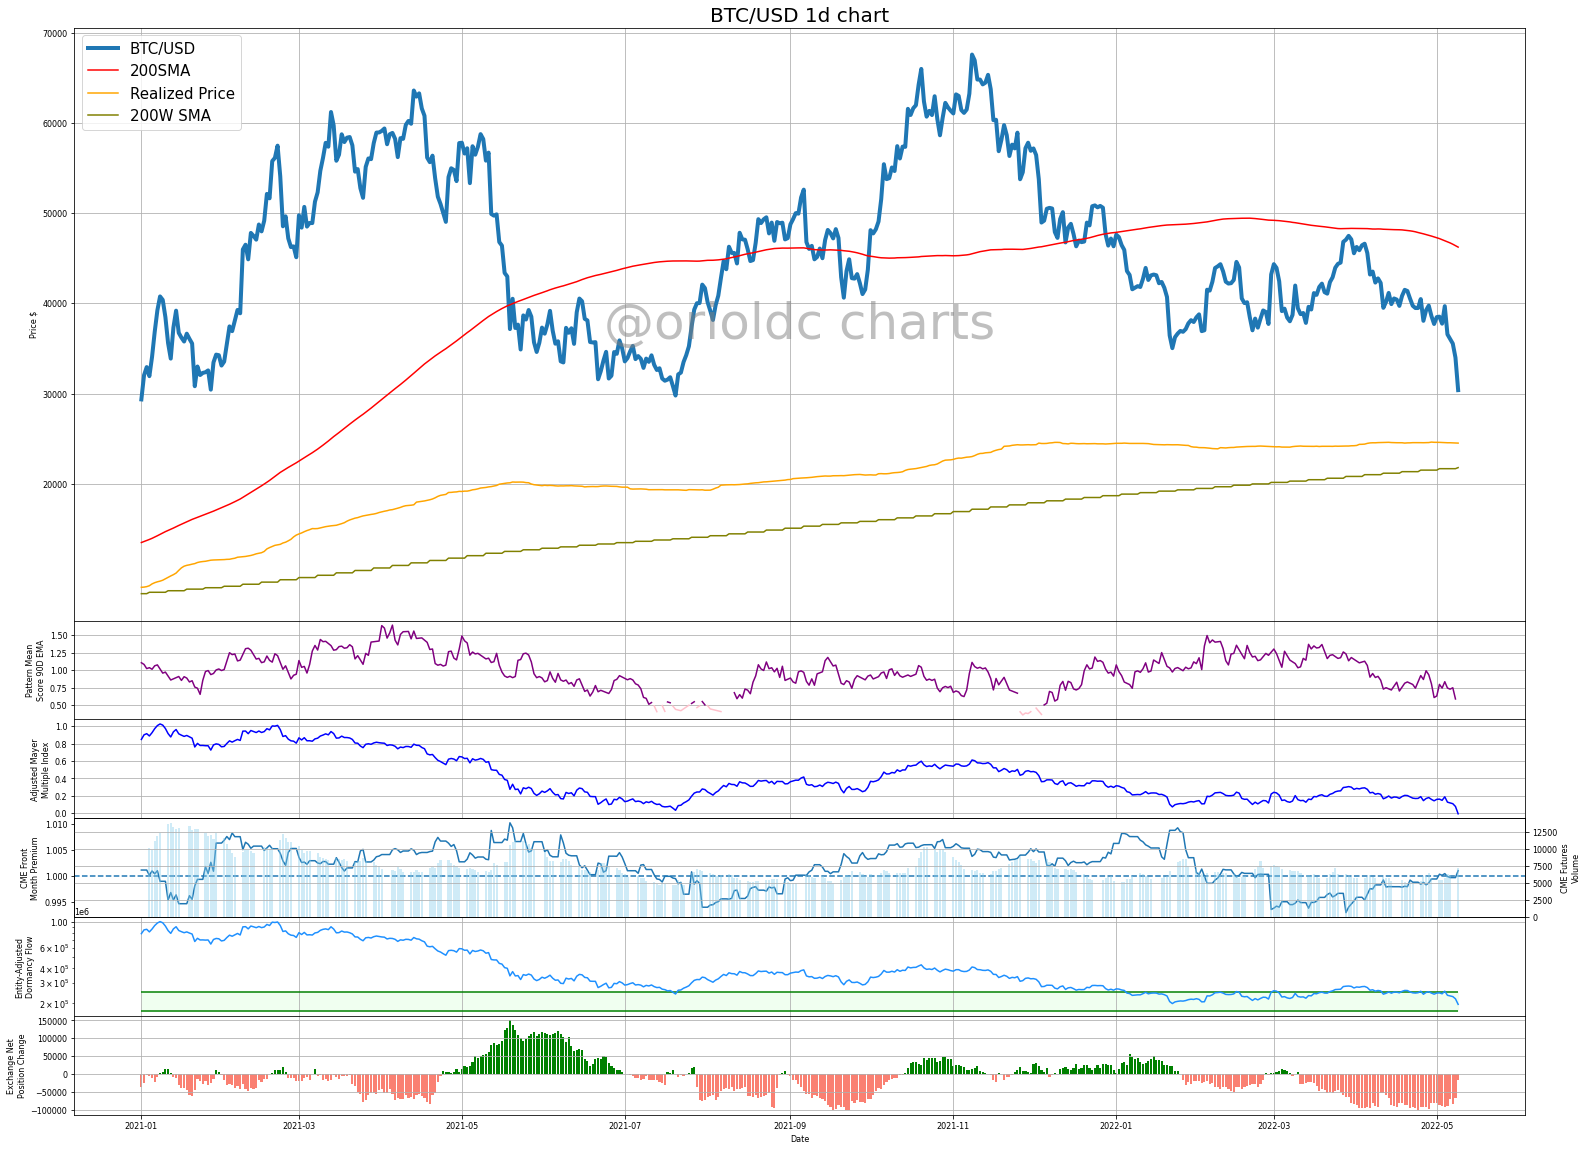

In [ ]:
# visualizing the data so far using matplotlib

# Filter data between two dates
df_2021 = df.loc[(df['date'] >= '2021-01-01')
                     & (df['date'] < str(yesterday))]


plt.rc('font', size=8)

fig, (ax0, ax1, ax2, ax3, ax5, ax6) = plt.subplots(6,1, sharex=True, 
                                                        gridspec_kw={'height_ratios': [6,1,1,1,1,1]},
                                                        figsize=(26,20))

x = df_2021['date']

#ticks = [2500, 5000, 10000, 20000, 40000, 50000, 70000]

ticks = [20000, 30000, 40000, 50000, 60000, 70000]

labels = ['BTC/USD', '200SMA', 'Realized Price','200W SMA']

yesterday = dt.date.today() - dt.timedelta(days=1)

filename = 'BtcUsd_1d_onchain_futures_v1_2021_{}.jpg'.format(yesterday)

# plot price, 200-SMA, realized price, 200W MA

ax0.plot(x, df_2021['close'], linewidth = 4)
ax0.plot(x, df_2021['200SMA'], color='red')
ax0.plot(x, df_2021['realized_price'], color='orange')
ax0.plot(x, df_2021['200_week_SMA'], color='olive')
ax0.text(0.5, 0.5, '@orioldc charts', transform=ax0.transAxes,
        fontsize=50, color='gray', alpha=0.5,
        ha='center', va='center')
#ax0.set_yscale('log')
ax0.set_yticks(ticks, minor=False)
#ax0.yaxis.set_major_formatter(ScalarFormatter()) # removes scientific notation from y-axis
#ax0.set_ticks(ticks, minor=True)
ax0.set_ylabel('Price $')
ax0.set_title('BTC/USD 1d chart', size=20)
ax0.legend(labels, loc='upper left', prop={'size': 15})
ax0.grid(True)

# plot pattern mean score

y_pms = df_2021['pattern_mean_score_90D_EMA']
pms_05_plus = y_pms.copy() # create two different lines for above one and below one
pms_05_minus = y_pms.copy()
pms_05_plus[pms_05_plus <= 0.5] = np.nan # convert numbers above and below to np.nan
pms_05_minus[pms_05_plus >= 0.5] = np.nan
ax1.plot(x, pms_05_plus, color='purple')
ax1.plot(x, pms_05_minus, color='pink')
ax1.set_ylabel('Pattern Mean\nScore 90D EMA')
ax1.grid(True)

# plot mayer mutliple index

ax2.plot(x, df_2021['adjusted_mayer_multiple_index'], color='blue')
ax2.set_ylabel('Adjusted Mayer\nMultiple Index')
ax2.grid(True)

#cme front month futures

ax35 = ax3.twinx()
ax3.plot(x,df_2021['cme_premium_EMA30'])
ax3.set_ylabel('CME Front\nMonth Premium')
ax3.axhline(1, linestyle='--')
ax35.bar(x, df_2021['cme_volume_EMA14'], width=0.8, color='skyblue', alpha=0.4)
ax35.set_ylabel('CME Futures\nVolume')
ax35.set_xlabel('Date')
ax35.grid(True)

# plot market cap to thermocap ratio

#ax4.plot(x,df_2021['marketcap_thermocap_ratio'], color='orangered')
#ax4.plot(x,df_2021['tc_topband'], color='coral')
#ax4.plot(x,df_2021['tc_lowerband'], color='darkgoldenrod')
#ax4.set_ylabel('Market Cap to\nThermo Cap Ratio')
#ax4.grid(True)


# plot entity-adjusted dormancy flow

ax5.plot(x,df_2021['dormancy_flow'], color='dodgerblue')
ax5.set_yscale('log')
ax5.yaxis.set_major_formatter(ScalarFormatter())
ax5.hlines(170000,x.min(),x.max(), color='green')
ax5.hlines(250000,x.min(),x.max(), color='green')
ax5.fill_between(x, 170000,250000, color='honeydew')
ax5.set_ylabel('Entity-Adjusted\nDormancy Flow')
ax5.grid(True)

# plot exchange net positon change

y_enpc = df_2021['exchange_net_position_change']
enpc_0_plus = y_enpc.copy() # create two different lines for above one and below one
enpc_0_minus = y_enpc.copy()
enpc_0_plus[enpc_0_plus <= 0] = np.nan # convert numbers above and below to np.nan
enpc_0_minus[enpc_0_minus >= 0] = np.nan
ax6.bar(x, enpc_0_plus, color='green')
ax6.bar(x, enpc_0_minus, color='salmon')
ax6.set_ylabel('Exchange Net\nPosition Change')
ax6.grid(True)
ax6.set_xlabel('Date')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)

#save image as file
from google.colab import files
plt.savefig(filename, facecolor='white', dpi=96)
files.download(filename) 
plt.show()

In [ ]:
metrics_matter = df[['date', 'close', '200SMA', 'realized_price', '200_week_SMA', 'pattern_mean_score_90D_EMA', 'adjusted_mayer_multiple_index', 'cme_volume_EMA14','exchange_net_position_change']]

metrics_matter.tail(7)

,date,close,200SMA,realized_price,200_week_SMA,pattern_mean_score_90D_EMA,adjusted_mayer_multiple_index,cme_volume_EMA14,exchange_net_position_change
4309,2022-05-04,39693.111461,46959.125058,24552.339982,21674.782535,0.835186,0.188939,5749.264511,-90293.299786
4310,2022-05-05,36566.416494,46833.755265,24549.260065,21674.782535,0.744771,0.127515,6316.295910,-87544.211784
4311,2022-05-06,36054.160121,46704.148331,24549.647745,21674.782535,0.728402,0.118677,6235.723122,-67609.778364
4312,2022-05-07,35542.908407,46560.671517,24530.587531,21674.782535,0.748423,0.109937,NaN,-81539.362008
4313,2022-05-08,33987.641361,46400.626893,24523.018040,21674.782535,0.587856,0.077902,NaN,-66266.053768
4314,2022-05-09,30384.579816,46240.623957,24510.566159,21792.974334,0.430818,-0.006255,7123.760039,-15095.945816
4315,2022-05-10,31007.755089,46092.145585,24478.457388,21792.974334,0.385320,0.011848,NaN,7766.046036


In [ ]:

# Filter by multiple conditions
#print(df.query("`Courses Fee` >= 23000 and `Courses Fee` <= 24000"))

metrics_matter_ammi = metrics_matter.query("`adjusted_mayer_multiple_index` <= 0.02")
#print(metrics_matter.query("`adjusted_mayer_multiple_index` <= 0.02"))

metrics_matter_ammi[['date','close','adjusted_mayer_multiple_index']].tail(20)

,date,close,adjusted_mayer_multiple_index
485,2011-11-14,2.142239,0.004651
488,2011-11-17,2.250000,0.017138
489,2011-11-18,2.051027,-0.006475
490,2011-11-19,2.199432,0.011422
491,2011-11-20,2.199870,0.011522
3064,2018-12-06,3521.101724,0.004893
3065,2018-12-07,3419.937200,-0.008879
3066,2018-12-08,3476.114715,0.001713
3068,2018-12-10,3505.479683,0.009408
3069,2018-12-11,3423.519488,-0.001787


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

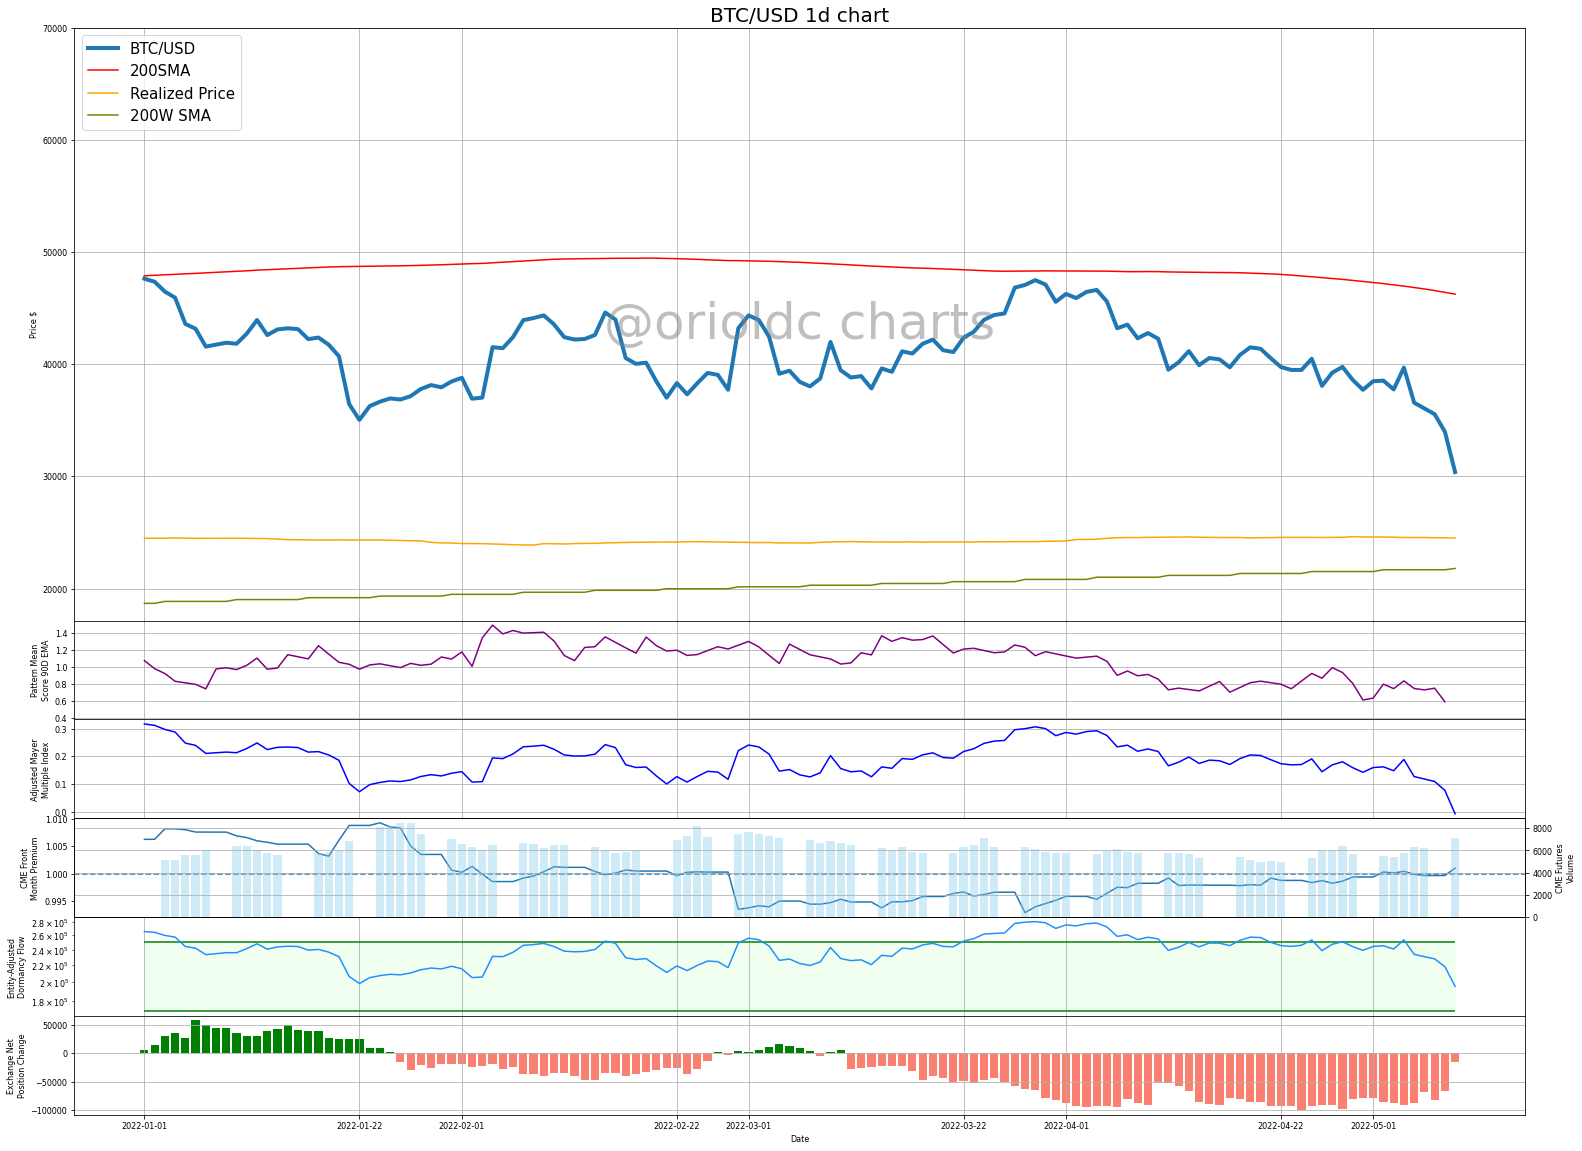

In [ ]:
# visualizing the data so far using matplotlib

# Filter data between two dates
df_2022 = df.loc[(df['date'] >= '2022-01-01')
                     & (df['date'] < str(yesterday))]


plt.rc('font', size=8)

fig, (ax0, ax1, ax2, ax3, ax5, ax6) = plt.subplots(6,1, sharex=True, 
                                                        gridspec_kw={'height_ratios': [6,1,1,1,1,1]},
                                                        figsize=(26,20))

x = df_2022['date']

#ticks = [2500, 5000, 10000, 20000, 40000, 50000, 70000]

ticks = [20000, 30000, 40000, 50000, 60000, 70000]

labels = ['BTC/USD', '200SMA', 'Realized Price','200W SMA']

yesterday = dt.date.today() - dt.timedelta(days=1)

filename = 'BtcUsd_1d_onchain_futures_v1_2022_{}.jpg'.format(yesterday)

# plot price, 200-SMA, realized price, 200W MA

ax0.plot(x, df_2022['close'], linewidth = 4)
ax0.plot(x, df_2022['200SMA'], color='red')
ax0.plot(x, df_2022['realized_price'], color='orange')
ax0.plot(x, df_2022['200_week_SMA'], color='olive')
ax0.text(0.5, 0.5, '@orioldc charts', transform=ax0.transAxes,
        fontsize=50, color='gray', alpha=0.5,
        ha='center', va='center')
#ax0.set_yscale('log')
ax0.set_yticks(ticks, minor=False)
#ax0.yaxis.set_major_formatter(ScalarFormatter()) # removes scientific notation from y-axis
#ax0.set_ticks(ticks, minor=True)
ax0.set_ylabel('Price $')
ax0.set_title('BTC/USD 1d chart', size=20)
ax0.legend(labels, loc='upper left', prop={'size': 15})
ax0.grid(True)

# plot pattern mean score

y_pms = df_2022['pattern_mean_score_90D_EMA']
pms_05_plus = y_pms.copy() # create two different lines for above one and below one
pms_05_minus = y_pms.copy()
pms_05_plus[pms_05_plus <= 0.5] = np.nan # convert numbers above and below to np.nan
pms_05_minus[pms_05_plus >= 0.5] = np.nan
ax1.plot(x, pms_05_plus, color='purple')
ax1.plot(x, pms_05_minus, color='pink')
ax1.set_ylabel('Pattern Mean\nScore 90D EMA')
ax1.grid(True)

# plot mayer mutliple index

ax2.plot(x, df_2022['adjusted_mayer_multiple_index'], color='blue')
ax2.set_ylabel('Adjusted Mayer\nMultiple Index')
ax2.grid(True)

#cme front month futures

ax35 = ax3.twinx()
ax3.plot(x,df_2022['cme_premium_EMA30'])
ax3.set_ylabel('CME Front\nMonth Premium')
ax3.axhline(1, linestyle='--')
ax35.bar(x, df_2022['cme_volume_EMA14'], width=0.8, color='skyblue', alpha=0.4)
ax35.set_ylabel('CME Futures\nVolume')
ax35.set_xlabel('Date')
ax35.grid(True)

# plot market cap to thermocap ratio

#ax4.plot(x,df_2021['marketcap_thermocap_ratio'], color='orangered')
#ax4.plot(x,df_2021['tc_topband'], color='coral')
#ax4.plot(x,df_2021['tc_lowerband'], color='darkgoldenrod')
#ax4.set_ylabel('Market Cap to\nThermo Cap Ratio')
#ax4.grid(True)


# plot entity-adjusted dormancy flow

ax5.plot(x,df_2022['dormancy_flow'], color='dodgerblue')
ax5.set_yscale('log')
ax5.yaxis.set_major_formatter(ScalarFormatter())
ax5.hlines(170000,x.min(),x.max(), color='green')
ax5.hlines(250000,x.min(),x.max(), color='green')
ax5.fill_between(x, 170000,250000, color='honeydew')
ax5.set_ylabel('Entity-Adjusted\nDormancy Flow')
ax5.grid(True)

# plot exchange net positon change

y_enpc = df_2022['exchange_net_position_change']
enpc_0_plus = y_enpc.copy() # create two different lines for above one and below one
enpc_0_minus = y_enpc.copy()
enpc_0_plus[enpc_0_plus <= 0] = np.nan # convert numbers above and below to np.nan
enpc_0_minus[enpc_0_minus >= 0] = np.nan
ax6.bar(x, enpc_0_plus, color='green')
ax6.bar(x, enpc_0_minus, color='salmon')
ax6.set_ylabel('Exchange Net\nPosition Change')
ax6.grid(True)
ax6.set_xlabel('Date')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)

#save image as file
from google.colab import files
plt.savefig(filename, facecolor='white', dpi=96)
files.download(filename) 
plt.show()